# Setting Up Notebook

## Importing Required Packages

Import Statements for required python libraries / local functions

In [5]:
# Data Analysis Tools
import numpy as np
import pandas as pd
import re
import os

# Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter

# Packages for BLAST
from Bio.Blast import NCBIWWW, NCBIXML
from Bio import Entrez, SeqIO
import time

We will also set up Pandas here to show the DataFrames with the desired options active

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Databases

Import excel file and save it to dataframe called raw_data

In [11]:
print(os.getcwd())

C:\Data_Analysis\WSL_Project\WSL_JupyterProject\jupyter_notebooks


In [7]:
# working directory for this notebook is "Scripts", hence the relative path
raw_data = pd.read_excel(
    "data/raw_data/PHP_diagnostics_2016_2024.xlsx",
    engine="openpyxl",
    na_values=["NA", "N/A"]
)

C:\Users\adrie\miniconda3\envs\wsl_projectenv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Creating Copies of Raw Data that can Safely be Modified

In [8]:
# Create new DataFrame
clean_data = raw_data.copy()

## Understanding Data Completeness

This next section aims to show the missing data from a selection of columns in the database

In [9]:
def load_and_check_missing(file_path, na_values=None, new_names=False, show_size=False):
    """
    Load an Excel file and count missing values, including custom missing indicators.

    Parameters:
    - file_path: str, path to the Excel file.
    - na_values: list or None (default), additional strings to consider as missing. (e.g. ["NA", "N/A"])
    - new_names: Built to take a dictionary that provides a subset of columns of df (keys)
                 and the desired custom names for each respective column(values)

    Returns:
    - DataFrame with missing counts per column.
    """
    # Read Excel with additional missing values if provided
    df = pd.read_excel(file_path, na_values=na_values)

    if show_size is True:
        # This shows the size of the dataframe
        print("\nNumber of rows:", df.shape[0])
        print("\nNumber of columns:", df.shape[1])
        print("\nMissing values per column:")

    # Optionally, you can replace further if needed
    # df.replace("NA", np.nan, inplace=True)

    # isnull() returns true (numerically 1) for each missing datapoint
    # .sum() adds them all together
    missing_df = df.isnull().sum()

    # Convert Series to DataFrame (important for future analysis and visualization)
    missing_df = missing_df.reset_index()
    missing_df.columns = ['Columns', 'Missing Values']

    # Set the rownames by using the content of the "Column" colum from the df
    missing_df = missing_df.set_index("Columns")

    if new_names is False:
        if show_size is True:
            print(missing_df)
        return missing_df

    else:
        # get the names of the rows of interest from our new_names
        selected_rows = list(new_names.keys())
        # now select them from the df
        missing_df_selected = missing_df.loc[selected_rows]
        # rename them
        missing_df_selected = missing_df_selected.rename(index=new_names)
        # transform back into 2 column df to be compatible with plotting function
        # reset the index to turn it back into first column
        missing_df_selected = missing_df_selected.reset_index()
        # set names for both columns
        missing_df_selected.columns = ["Columns", "Missing Counts"]
        # return subset of df
        if show_size is True:
            print(missing_df_selected)
        return missing_df_selected

In [10]:
# identify missing data for each column in the entire dataframe
missing_counts = load_and_check_missing("data/raw_data/PHP_diagnostics_2016_2024.xlsx", ["NA"], show_size=True)


# we now wish to select a buset of columns to analyze (and give them better names)
# this dictionary selects the columns of interest and also provides a more concise name that simplifies the plot
new_names = {
    "Au_DNA_ID": "Auftrag DNA ID",
    "Au_Fundort": "Fundort",
    "Labor::La_DNA_ID": "Labor DNA ID",
    "Labor::La_Sequenz": "Sequenz",
    "Resultate::Re_Analyse_ID": "Analyse ID",
    "Resultate::Re_Resultat": "Resultat"
}

# calling missing counts again but this time with the new_names argument
missing_counts_selected = load_and_check_missing("data/raw_data/PHP_diagnostics_2016_2024.xlsx", ["NA"], new_names=new_names, show_size=False)
# missing_counts


C:\Users\adrie\miniconda3\envs\wsl_projectenv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")



Number of rows: 17810

Number of columns: 49

Missing values per column:
                                     Missing Values
Columns                                            
Au_Auftraggeber                                3261
Au_Auftragsdatum                               3447
Au_Bemerkungen                                 8752
Au_DNA_ID                                      3230
Au_Erstellt_am                                 3569
Au_Erstellt_von                               10499
Au_Forschung_Diagnostik                        9003
Au_Fundort                                     4050
Au_Material                                    3375
Au_Organismus                                  3285
Au_Probe_Nr                                    3243
Au_Projekt                                     3333
Au_Verdacht                                    3405
Au_Wirt                                        4299
Labor::Analyse_ID                               652
Labor::La_BearbeitendeR_Extr              

C:\Users\adrie\miniconda3\envs\wsl_projectenv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Set the theme for all future sns plots in this session. (Can always be altered later if needed, naturally)

In [11]:
sns.set_theme(
    style="whitegrid",  # e.g. "darkgrid", "whitegrid", "ticks"
    context="paper",     # "paper", "notebook", "talk", or "poster"
    font_scale=1.2
)      # overall font size scaling)

### Visualizing Data Completeness in Key Columns

Plotting missing data

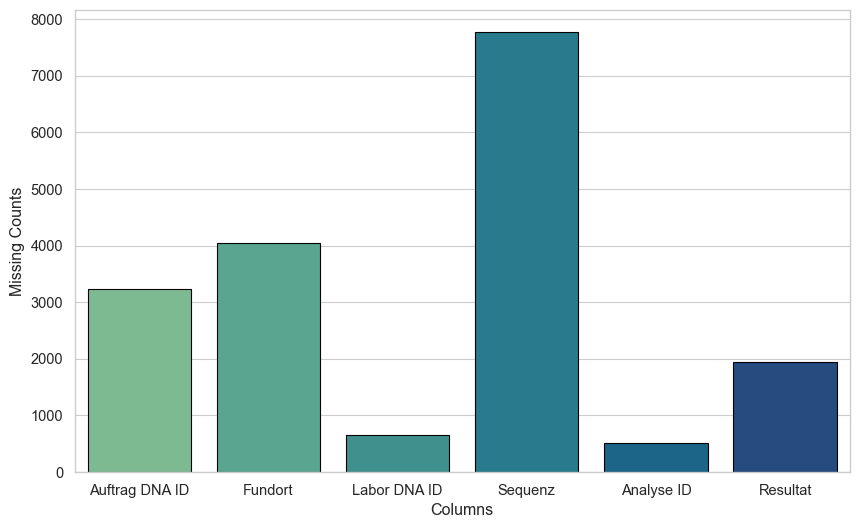

In [12]:
# Plot missing data for selected columns
plt.figure(figsize=(10, 6))

bp = sns.barplot(
    missing_counts_selected,
    x="Columns",
    y="Missing Counts",
    palette = "crest",  # or "deep", "muted", "bright", etc.
    edgecolor = "black",  # outlines around bars
    hue = "Columns",
    legend=False,
    saturation = 1.0,  # how intense the colors appear
)

plt.show()


# Genetic Data Trends

## Preparing Data for Genetical Analysis

### Identifying duplicate or missing DNA IDs

In [13]:
# The following shows that there are either duplicates or missing values in Au_DNA_ID
# IMPORTANT: We need to subtract 1 from the unique DNA_IDs since .unique() will also count 1 NaN value as a "unique DNA ID"
Au_DNA_ID_column_length, total_amount_unique_DNA_ID = len(clean_data["Au_DNA_ID"]), len(clean_data["Au_DNA_ID"].unique()) - 1
Au_DNA_ID_column_length, total_amount_unique_DNA_ID

(17810, 14500)

In [14]:
# We can find the amount of missing values
missing_DNA_IDs = sum(clean_data["Au_DNA_ID"].isnull())
missing_DNA_IDs

3230

Amount of non-missing DNA IDs:

In [15]:
# this describes the total amount of DNA_IDs, including duplicates
total_amount_DNA_ID = Au_DNA_ID_column_length - missing_DNA_IDs
total_amount_DNA_ID

14580

Amount of duplicates:

In [16]:
# .duplicated() returns a bool series with true for each row that occurs multiple times
# keep = False marks all duplicates as True
# since we want to know how many extra "extra" rows we have, we use keep = first, which excludes the first occurrence in any duplicate series
# IMPORTANT: .duplicated() also counts NaN values, with keep=first counting all NaN - 1 (the first being excluded)
total_amount_duplicates = sum(clean_data['Au_DNA_ID'].duplicated(keep="first"))
total_amount_duplicates

3309

Amount of duplicates that aren't NaN values:

In [17]:
total_amount_non_NaN_duplicates = sum(clean_data['Au_DNA_ID'].duplicated(keep="first") & clean_data['Au_DNA_ID'].notnull())
total_amount_non_NaN_duplicates

80

Checking that those numbers add up:

In [18]:
Au_DNA_ID_column_length == missing_DNA_IDs + total_amount_unique_DNA_ID + total_amount_non_NaN_duplicates

True

We can now see the amount of DNA IDs that are actually unique. Let's represent some of this data in a bar chart and pie chart.

### Visualizing the Au_DNA_ID column

In [19]:
# making dictionary for values included in our visualization
metrics = {
    # "Total Entries": Au_DNA_ID_column_length,
    "Unique IDs": total_amount_unique_DNA_ID,
    "Missing IDs": missing_DNA_IDs,
    "Duplicates \n(Excluding Missing IDs)": total_amount_non_NaN_duplicates
}

# Create a DataFrame from the metrics dictionary
df_metrics = pd.DataFrame({
    "Metric": list(metrics.keys()),
    "Count": list(metrics.values())
})

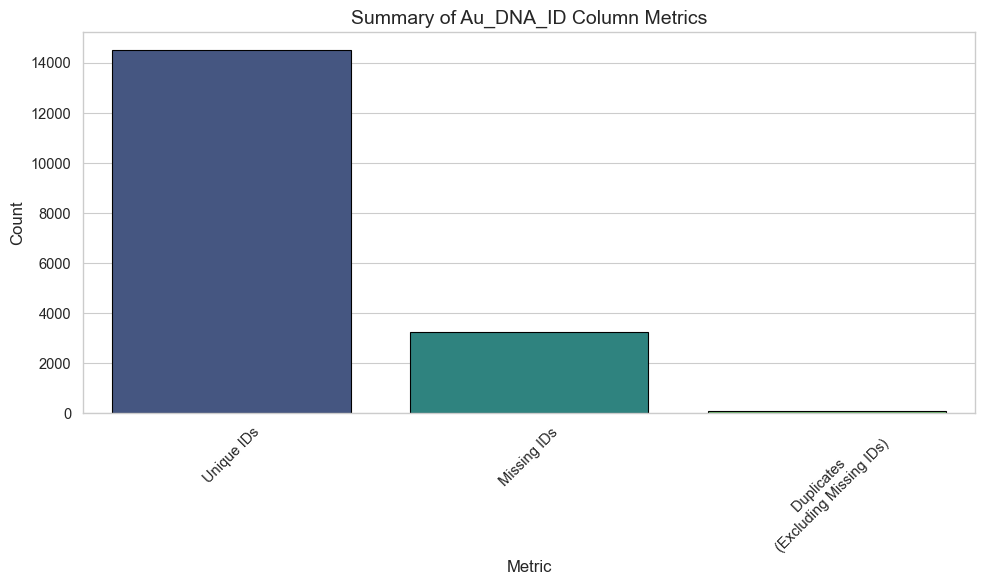

In [20]:
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x="Metric", y="Count", palette="viridis", hue="Metric", edgecolor="black")
plt.title("Summary of Au_DNA_ID Column Metrics", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="center")    # ha = center makes sure that the x-axis labels are center aligned (if they have more than one line of text)
plt.tight_layout()
plt.show()

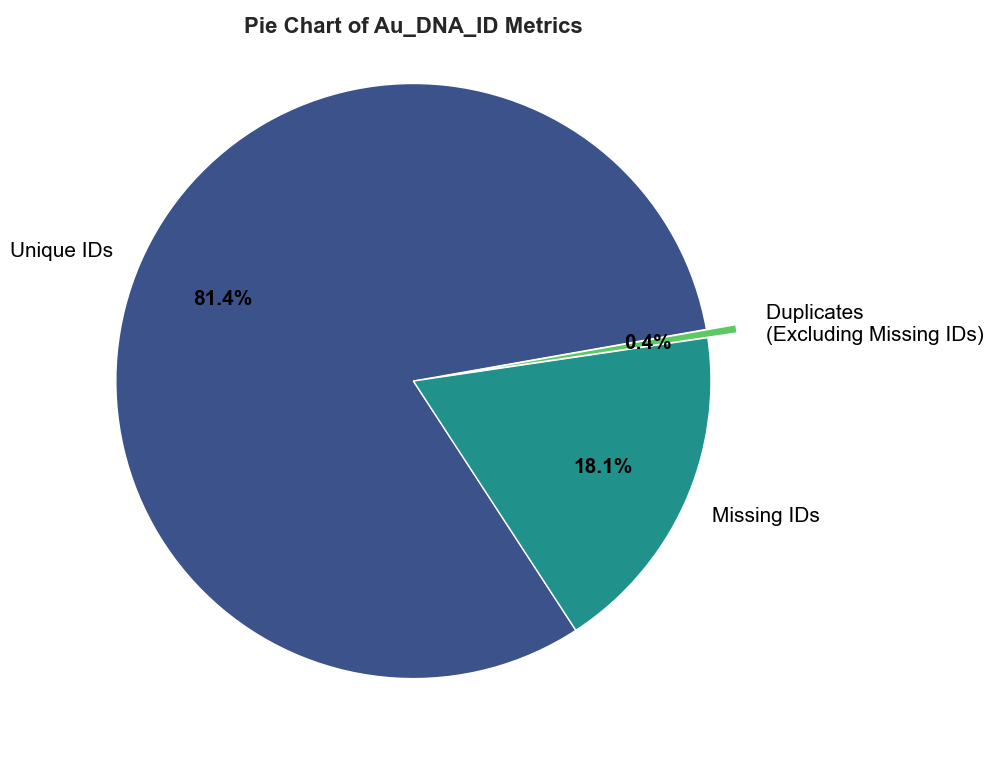

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# setup color palette
colors = sns.color_palette("viridis", n_colors=len(metrics))

# Convert metric dictionary to values and labels
labels = list(metrics.keys())
sizes = list(metrics.values())


# optionally explode the smallest slice:
explode = [0.1 if v == min(sizes) else 0 for v in sizes]
# explode = [0, 0, 0]  # no explode

# Create the pie chart
# texts handles the plot labels while autotext handles the percentage values within the pie
patches, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=10,      # rotate start angle for aesthetics
    colors=colors,
    labeldistance=1.1,     # distance of label from center
    pctdistance=0.7,       # distance of % label from center
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'antialiased': True}
)

# Increase the font size for labels
for text in texts:
    text.set_fontsize(15)
    text.set_color('black')
    # text.set_rotation(0)
    # text.set_rotation_mode("default")
    # text.set_ha("center")  # Try adjusting alignment if needed

# Increase the font size and change color for percentage text
for autotext in autotexts:
    autotext.set_fontsize(15)
    autotext.set_color('black')
    autotext.set_weight('bold')
    autotext.set_verticalalignment("center")
    autotext.set_horizontalalignment('center')


# Set title with a bit more padding
ax.set_title("Pie Chart of Au_DNA_ID Metrics", fontsize=16, pad=10, y=0.95, fontweight='bold')

plt.tight_layout()
plt.show()

### Assign New Primer Labels

The aim of this section is to generate new, standardized labels for the primers that were used in the diagnostic process. The goal is to have a primer category as well as a specific primer label that is identical for each primer used.

This will require us to
1) Identify existing primer labels
2) Assign each primer type a standardized label and category
3) Add this information into two new columns

#### Assigning Standardized Primer Categories in new Primer Column

We need to view the types of primers used to later group them into more standardized categories.

In [22]:
primer_types = clean_data['Labor::La_PCR_Primer'].value_counts()
primer_types

Labor::La_PCR_Primer
ITS5 & ITS4 (Fungi)                                                            3097
qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P           1349
ITS1 & ITS4 (Fungi)                                                            1266
qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe                         1046
qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe     889
                                                                               ... 
PTS_p5/u5                                                                         1
PTS_p5/u4                                                                         1
C.P.Sn.For1/Rev11                                                                 1
C.P.Sn.For1/Rev12                                                                 1
C.P.Sn.For1/Rev15                                                                 1
Name: count, Length: 229, dtype: int64

#### Dictionaries with Primer Labels

Now, we can make dictionaries that include the new labels we want to assing.

In [23]:
standardized_primer_labels = [
    # barcode sequencing primers
    "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    "OoCox2F & OoCox2R (Oomycetes)",
    "ITS5 & ITS4 (Fungi)",
    "ITS1F & ITS4 (F spezifisch, Fungi)",
    "EFCF1 & EFCF2 (TEF1, Fungi)",
    "ACT-512F & ACT-783R (ACT, Fungi)",
    "RPB1 & RPB2 (RPB1, Fungi)",
    "RPB2-5f & RPB2-7cR (RPB2, Fungi)",
    "TUB2Fd & TUB4Rd (TUB2, Fungi)",
    "LR0R & LR5 (LSU, Fungi)",
    "PNS1 & NS8 (SSU, Fungi)",
    "ITS1F & ITS4-B (Basidiomyzeten, Fungi)",
    "ITS6 & ITS4BR-rev (Rostpilze, Fungi)",
    "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)",
    "ITS5u & ITS4rust (Fungi, Rust specific)",
    "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "ITS1 & ITS4 (Fungi/Plants)",
    "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum, Fungi)",
    "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola, Fungi)",
    "LCO1490 & HCO2198 (Insects)",
    "LEP-F1 & LEP-R1 (Insects)",
    "Fol-degen-for & Fol-degen-rev (Insects)",
    "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    "3690s & a4285 (Insects)",
    "apCADforB2 & apCADrecImod (Insects)",
    "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "COI_J_2183 & COI_N_2568 (Coccoidea/Schildläuse, Insects)",
    "AmbroF & AmbroR (Ambrosiella-spezifisch, Insects)",
    "ITS 1/2 & Fol-1t-F/R (Nematodes)",
    "Burs 15S_F & Burs 5.8S_R_degen (Bursaphelenchus sp, Nematodes)",
    "27F & 1492R (Bacteria)",
    "704F & 1492R (Bacteria)",
    "27F & 787R (Bacteria)",
    "gyrB-F & gyrB-R (Bacteria)",
    "gyrB 1408F & gyrB 2242R (Bacteria)",
    "recA1f & recA1r (recA, Bacteria)",
    "LAP5 & LAPS27 (rpoB, Bacteria)",
    "PsEG30F & PsEG790R (rpoD, Bacteria)",
    "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "trnH2 & psbAF (Plants)",
    "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
    "Microsatellites C. parasitica (Fungi)",
    "Microsatellites H. fraxineus (Fungi)",
    "Microsatellites P. ramorum (Oomycete)",
    "Microsatellites A. glabripennis (ALB) (Insects)",
    # qPCR primers
    "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "qPCR: ALB_185/347, ALB_320 probe, 18S uni-F/R/P",
    "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "qPCR: AM-Aes1-F/AM-Aes1-R",
    "qPCR: BSatF/R/S, 18S uni-F/R/P",
    "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P",
    "qPCR: Pcin_147F2/Pcin5_246R2/PcinP, 18S uni-F/R/P",
    "qPCR: Pcamb1/Pcamb2",
    "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
    "qPCR: EABFOT/EABROT",
    "qPCR: EABFOT/EABROT/EAB-RC P1 FAM, UNI28S-fwd/rev/P JOE",
    "qPCR: Anax_For/Anax_Rev/Anax_Probe ABY, UNI28S-fwd/rev/P JOE",
    "qPCR: Anax_For/Anax_Rev/Anax_Probe ABY, UNI28S-fwd/rev/P VIC",
    "qPCR: EABFOT/EABROT/EAB-RC P1 FAM, BiB-COI F1/ BiB-COI R1/ BiB-COI P1 ABY, UNI28S-fwd/rev/P JOE",
    "qPCR: DendCOI F429-54 & DendCOI R606-24, DendCOI T555-69 FAM; DS ITS2 F102-27 & DS ITS2 2A-T R339-58, DS ITS2 T293-304 ABY-QSY",
    "qPCR: Cf P2-01/Cf P2-03/CfP2 FAM, UNI28S-fwd/UNI28S-rev/UNI28S-P JOE",
    "qPCR: Ypap2F/Ypap2R/Ypap-probe, UNI28S-fwd/UNI28S-rev/UNI28S-P JOE",
    "qPCR: Pcin_147F2/Pcin5_246R2/Pcin_Probe_FAM, Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
    "qPCR: Pcin_147F2/Pcin5_246R2/Pcin_Probe_FAM, Pcamb1/Pcamb3/Pcamb P2 JUN, PhyG_F2/PhyG_Rb/TrnM_PhyG_probe2 VIC",
    "qPCR: pram-114Fc/190R/PramP-1527-134-T FAM, PramEU1_358306_F/PramEU1_358306_R/PramEU1-358-P ABY, PramEU2_268080_F/PramEU2_268080_R/PramEU2-268a-P JUN, PhyG_F2/PhyG_Rb/TrnM_PhyG_probe2 VIC"
]

We now need to map the old labels to the new ones. Due to errors made in their initial classifications, a 1 to 1 mapping table might be hard. We will try to use an LLM (GPT o3-mini (high)) to sort the labels initially and then make a manual review and commenting.

In [24]:
old_primer_labels = {
    "ITS5 & ITS4 (Fungi)": "",
    "ITS1 & ITS4 (Fungi)": "",
    "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P": "",
    "Microsatellites": "",
    "ITS6 & ITS4 (Phytophthora)": "",
    "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe": "",
    "HCO/LCO (insects)": "",
    "ITS1F & ITS4 (Fungi)": "",
    "18Ph2F & 28Ph2R (Phytophthora specific)": "",
    "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe": "",
    "qPCR: BSatF/R/S, 18S uni-F/R/P ": "",
    "DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P (qPCR Dothi)": "",
    "pram-114Fc/190R, Pram probe, cox F/RV, cox Probe (qPCR Pram)": "",
    "NoF & NoNuR (Verticillium nonalfalfae specific)": "",
    "LCO1490 & HCO2198 (Insekten)": "",
    "gyrB-F & gyrB-R (Bakterien)": "",
    "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum)": "",
    "704F & 1492R (Bakterien)": "",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_VIC": "",
    "LEP-F1 & LEP-R1 (insects)": "",
    "27F & 1492R (bacteria)": "",
    "qPCR: Cfrax-F, Cfrax-R, Cfrax_Probe_FAM, UNI28S-fwd/rev/P joe": "",
    "LEP-F1 & LEP-R1": "",
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F, Bg-R, Bg-P; Rv-F, Rv-R, Rv57P": "",
    "ITS 1/2 & Fol-1t-F/R (nematodes)": "",
    "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica": "",
    "27F & 1492R (Bakterien)": "",
    "ITS1 & ITS4": "",
    "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola)": "",
    "qPCR: AM-Aes1-F/AM-Aes1-R": "",
    "PMITS1 & PMITS2 (Mehltau)": "",
    "18Ph2F & 28Ph2R (Phytophthora-spezifisch)": "",
    "EF1 & EF2 (Fungi)": "",
    "18Ph-F & 28Ph-R (Phytophthora specific)": "",
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe": "",
    "gyrB-F & gyrB-R (bacteria)": "",
    "AM-Aes1-F/AM-Aes1-R (qPCR Psa)": "",
    "EF1-728 &EF1-986R (elong. Factor Fungi)": "",
    "EF595 F & ArmEF1a R (Armillaria sp.)": "",
    "Dothi-F1 & Dothi-R1": "",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_JOE": "",
    "gyrB-F & gyrB-R": "",
    "LEP-F1 & LEP-R1 (Insekten)": "",
    "qPCR: C.P.Sn.For1/Rev1; COX F/RW": "",
    "Fol-degen-for & Fol-degen-rev": "",
    "ITS2A & ITS2B (Dendrolimus spp)": "",
    "Bg-F, Bg-R, BgP, Gq-F, Gq-R, GqP": "",
    "GyrB": "",
    "rbcLA-f & rbcLa-rev (Pflanzen)": "",
    "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, Pcin_147F2/Pcin5_246R2/PcinP, UNI28S-fwd/rev/P joe": "",
    "Microsatellite": "",
    "PlanttrnLc & PlanttrnLd (Pflanzen)": "",
    "18Ph2F & 28Ph2R": "",
    "ITS1/4": "",
    "ITS5u/ITS4rust": "",
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P": "",
    "apCADforB2 & apCADrecImod (Insekten)": "",
    "3690s & a4285 (Insekten)": "",
    "Bakterien: gyrB-F & gyrB-R": "",
    "Ips_F_cons / Ips_R_cons": "",
    "C.P.Sn.For1/Rev1": "",
    "27F/787R": "",
    "18Ph2F & 28Ph2R (Phytophthora)": "",
    "ITS1 / ITS4": "",
    "704F & 1492R (bacteria)": "",
    "AG": "",
    "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P": "",
    "FCIR-F & FCIR-R (F. circinatum)": "",
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Porbe": "",
    "ITS1F & ITS4 (Fungi, F spezifisch)": "",
    "qPCR: Gq-F/R/P, Bg-F/R/P. Rv-F/R/P": "",
    "M13F-Fol-degen-for & M13R-Fol-degen-rev": "",
    "BSatF/R/S, 18S uni-F/R/P (qPCR Bxyl)": "",
    "HCO/LCO (Insects)": "",
    "Bakterien: 27F": "",
    "18Ph2F–28Ph2R": "",
    "PMITS1 / PMITS2": "",
    "Bakterien: 27F & 1492R": "",
    "Ips_F_cons & Ips_R_cons (insects/ Ips sp.)": "",
    "Bakterien: 704F": "",
    "Bakterien: 1492R": "",
    "EF595 F / ArmEF1a R": "",
    "qPCR: CfraxF/CfraxR, Cfrax_Probe, 28S_uni-F/28S_uni-R, 28S_uni-P": "",
    "PsEG30F & PsEG790R (bacteria)": "",
    "qPCR: ALB_185 & ALB_347; ALB_320 FAM; 18S uni-F & 18S uni-R": "",
    "S-D-Bact-0008-a-S-16 & S-D-Bact-1492-a-A-16 (bacteria)": "",
    "recA1f & recA1r (bacteria)": "",
    "LAP5 & LAPS27 (bacteria)": "",
    "MtF2 / MtR2": "",
    "ITS 1/2 & Fol-1t-F/R": "",
    "ITS5u / ITS4rust": "",
    "27F & 1492R": "",
    "DStub-F1/R1, DPtef1-F1/R2, Latef-F1/R1, 18S uni-F/R": "",
    "27F & 787R (Bakterien)": "",
    "OoCox2F & OoCox2R (Falscher Mehltau)": "",
    "Bg-F/R, Gq-F/R, Rv-F/R, 16Suni-F/R": "",
    "VIC-Loci multiplex 1/2 (C. parasitica)": "",
    "Dothi-F1 & Dothi-R (Dothistroma specific)": "",
    "rbcLA-f & rbcLa-rev (plants)": "",
    "H3-1a & H3-1b": "",
    "ITS_p5 & ITS_u4": "",
    "Bt1a & Bt1b": "",
    "Multiplex 1&2 für vic-Loci und MAT-Gene": "",
    "Bt2a & Bt2b": "",
    "EF1 & EF2 (Fungi) ": "",
    "Fol-t1 for & Fol-t1 rev": "",
    "LEP-F1 & LEP-R2": "",
    "ITS1F & ITS4,4": "",
    "ITS_p5 & ITS_p4": "",
    "Cp-F4/Cp-R3/Cp-S3_Probe/18S_uni-F/18S-uni-R/18S_uni-P_VIC": "",
    "ITS1F / ITS4": "",
    "Cp Vic Loci & Mating type multiplex": "",
    "Ins3.2F & Ins3.2R (insects)": "",
    "EpF & EpR": "",
    "PMITS1/PMITS2": "",
    "Ips_F_cons & Ips_R_cons (Ips sp.)": "",
    "PSA2F &PSA 2R": "",
    "HCO/LCO": "",
    "ITS6–ITS4": "",
    "ITS1F & ITS4-B (Basidiomycetes)": "",
    "ITS6 & ITS4BR-rev (Rostpilze)": "",
    "ITS 2A/B (Insekten)": "",
    "EpF/EpR": "",
    "C1-1554F/C1-2342R": "",
    "PMITS1 & PMITS2": "",
    "COI_J_2183F/COI_N_2568R": "",
    "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe": "",
    "ITS-p5 / ITS-u4": "",
    "PMITS1/2": "",
    "Bakterien: 787R": "",
    "18Ph-F & 28Ph-R (Phytophthora)": "",
    "gyrB-F & gyrB-R (Bacteria)": "",
    "ITS1 & ITS6": "",
    "ITS1 & ITS5": "",
    "ITS1 & ITS10": "",
    "ITS1 & ITS11": "",
    "ITS1 & ITS12": "",
    "LEP-F1 & LEP-R8": "",
    "LEP-F1 & LEP-R7": "",
    "LEP-F1 & LEP-R6": "",
    "LEP-F1 & LEP-R5": "",
    "LEP-F1 & LEP-R4": "",
    "LEP-F1 & LEP-R3": "",
    "27F & 708F & 787R & 1492R": "",
    "LEP-F1 & LEP-R9": "",
    "rbcLA-f rbcLa-rev": "",
    "ITS1 & ITS13": "",
    "ITS1 & ITS15": "",
    "ITS1 & ITS14": "",
    "ITS1 & ITS16": "",
    "ITS1 & ITS17": "",
    "ITS6 & ITS4": "",
    "XgyrFsp / XgyrRsp": "",
    "ITS1 & ITS18": "",
    "ITS1 & ITS19": "",
    "ITS1 & ITS7": "",
    "ITS1 & ITS8": "",
    "ITS1 & ITS9": "",
    "C.P.Sn.For1/Rev8": "",
    "C.P.Sn.For1/Rev15": "",
    "C.P.Sn.For1/Rev14": "",
    "C.P.Sn.For1/Rev7": "",
    "C.P.Sn.For1/Rev6": "",
    "COXF-CIT & COXR-CIT": "",
    "ITS1 & Hpsal (Hymenoscyphus fraxineus spezifisch)": "",
    "C.P.Sn.For1/Rev2": "",
    "C.P.Sn.For1/Rev3": "",
    "C.P.Sn.For1/Rev4": "",
    "C.P.Sn.For1/Rev5": "",
    "C.P.Sn.For1/Rev31": "",
    "C.P.Sn.For1/Rev30": "",
    "C.P.Sn.For1/Rev24": "",
    "C.P.Sn.For1/Rev25": "",
    "C.P.Sn.For1/Rev26": "",
    "C.P.Sn.For1/Rev27": "",
    "C.P.Sn.For1/Rev28": "",
    "C.P.Sn.For1/Rev29": "",
    "C.P.Sn.For1/Rev23": "",
    "C.P.Sn.For1/Rev22": "",
    "C.P.Sn.For1/Rev16": "",
    "C.P.Sn.For1/Rev17": "",
    "C.P.Sn.For1/Rev18": "",
    "C.P.Sn.For1/Rev19": "",
    "C.P.Sn.For1/Rev20": "",
    "C.P.Sn.For1/Rev21": "",
    "C.P.Sn.For1/Rev13": "",
    "C.P.Sn.For1/Rev12": "",
    "C.P.Sn.For1/Rev11": "",
    "C.P.Sn.For1/Rev10": "",
    "C.P.Sn.For1/Rev9": "",
    "ITS-p5 & ITS-u4": "",
    "ITS-p5 & ITS-u5": "",
    "ITS-p5 & ITS-u6": "",
    "PTS_p5/u4": "",
    "PTS_p5/u5": "",
    "PTS_p5/u6": "",
    "XgyrB1-F & XgyrB1-R (Xanthomonas)": "",
    "ITSp5/u4": "",
    "C_arcuata_1F/R": "",
    "C_arcuata_2F/R": "",
    "Aglab_cox1_F/R2": ""
}


In [25]:
standardized_primer_label_mapping = {
    "ITS5 & ITS4 (Fungi)": "ITS5 & ITS4 (Fungi)",
    "ITS1 & ITS4 (Fungi)": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P": "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "Microsatellites": "Microsatellites C. parasitica (Fungi)",
    "ITS6 & ITS4 (Phytophthora)": "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe": "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "HCO/LCO (insects)": "LCO1490 & HCO2198 (Insects)",
    "ITS1F & ITS4 (Fungi)": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "18Ph2F & 28Ph2R (Phytophthora specific)": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe": "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "qPCR: BSatF/R/S, 18S uni-F/R/P ": "qPCR: BSatF/R/S, 18S uni-F/R/P",
    "DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P (qPCR Dothi)": "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "pram-114Fc/190R, Pram probe, cox F/RV, cox Probe (qPCR Pram)": "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "NoF & NoNuR (Verticillium nonalfalfae specific)": "ITS1 & ITS4 (Fungi/Plants)",
    "LCO1490 & HCO2198 (Insekten)": "LCO1490 & HCO2198 (Insects)",
    "gyrB-F & gyrB-R (Bakterien)": "gyrB-F & gyrB-R (Bacteria)",
    "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum)": "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum, Fungi)",
    "704F & 1492R (Bakterien)": "704F & 1492R (Bacteria)",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_VIC": "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "LEP-F1 & LEP-R1 (insects)": "LEP-F1 & LEP-R1 (Insects)",
    "27F & 1492R (bacteria)": "27F & 1492R (Bacteria)",
    "qPCR: Cfrax-F, Cfrax-R, Cfrax_Probe_FAM, UNI28S-fwd/rev/P joe": "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "LEP-F1 & LEP-R1": "LEP-F1 & LEP-R1 (Insects)",
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F, Bg-R, Bg-P; Rv-F, Rv-R, Rv57P": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "ITS 1/2 & Fol-1t-F/R (nematodes)": "ITS 1/2 & Fol-1t-F/R (Nematodes)",
    "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica": "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
    "27F & 1492R (Bakterien)": "27F & 1492R (Bacteria)",
    "ITS1 & ITS4": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola)": "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola, Fungi)",
    "qPCR: AM-Aes1-F/AM-Aes1-R": "qPCR: AM-Aes1-F/AM-Aes1-R",
    "PMITS1 & PMITS2 (Mehltau)": "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "18Ph2F & 28Ph2R (Phytophthora-spezifisch)": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "EF1 & EF2 (Fungi)": "EF1 & EF2 (Fusarium sp., Fungi)",
    "18Ph-F & 28Ph-R (Phytophthora specific)": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "gyrB-F & gyrB-R (bacteria)": "gyrB-F & gyrB-R (Bacteria)",
    "AM-Aes1-F/AM-Aes1-R (qPCR Psa)": "qPCR: AM-Aes1-F/AM-Aes1-R",
    "EF1-728 &EF1-986R (elong. Factor Fungi)": "EFCF1 & EFCF2 (TEF1, Fungi)",
    "EF595 F & ArmEF1a R (Armillaria sp.)": "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "Dothi-F1 & Dothi-R1": "Dothi-F1 & Dothi-R (Dothistroma specific)",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_JOE": "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "gyrB-F & gyrB-R": "gyrB-F & gyrB-R (Bacteria)",
    "LEP-F1 & LEP-R1 (Insekten)": "LEP-F1 & LEP-R1 (Insects)",
    "qPCR: C.P.Sn.For1/Rev1; COX F/RW": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "Fol-degen-for & Fol-degen-rev": "Fol-degen-for & Fol-degen-rev (Insects)",
    "ITS2A & ITS2B (Dendrolimus spp)": "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "Bg-F, Bg-R, BgP, Gq-F, Gq-R, GqP": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "GyrB": "gyrB-F & gyrB-R (Bacteria)",
    "rbcLA-f & rbcLa-rev (Pflanzen)": "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, Pcin_147F2/Pcin5_246R2/PcinP, UNI28S-fwd/rev/P joe": "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
    "Microsatellite": "Microsatellites C. parasitica (Fungi)",
    "PlanttrnLc & PlanttrnLd (Pflanzen)": "trnH2 & psbAF (Plants)",
    "18Ph2F & 28Ph2R": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "ITS1/4": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS5u/ITS4rust": "ITS5u & ITS4rust (Fungi, Rust specific)",
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "apCADforB2 & apCADrecImod (Insekten)": "apCADforB2 & apCADrecImod (Insects)",
    "3690s & a4285 (Insekten)": "3690s & a4285 (Insects)",
    "Bakterien: gyrB-F & gyrB-R": "gyrB-F & gyrB-R (Bacteria)",
    "Ips_F_cons / Ips_R_cons": "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "C.P.Sn.For1/Rev1": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "27F/787R": "27F & 787R (Bacteria)",
    "18Ph2F & 28Ph2R (Phytophthora)": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "ITS1 / ITS4": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "704F & 1492R (bacteria)": "704F & 1492R (Bacteria)",
    "AG": "Unmapped",
    "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P": "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P",
    "FCIR-F & FCIR-R (F. circinatum)": "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Porbe": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "ITS1F & ITS4 (Fungi, F spezifisch)": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "qPCR: Gq-F/R/P, Bg-F/R/P. Rv-F/R/P": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "M13F-Fol-degen-for & M13R-Fol-degen-rev": "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    "BSatF/R/S, 18S uni-F/R/P (qPCR Bxyl)": "qPCR: BSatF/R/S, 18S uni-F/R/P",
    "HCO/LCO (Insects)": "LCO1490 & HCO2198 (Insects)",
    "Bakterien: 27F": "27F & 1492R (Bacteria)",
    "18Ph2F–28Ph2R": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "PMITS1 / PMITS2": "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "Bakterien: 27F & 1492R": "27F & 1492R (Bacteria)",
    "Ips_F_cons & Ips_R_cons (insects/ Ips sp.)": "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "Bakterien: 704F": "704F & 1492R (Bacteria)",
    "Bakterien: 1492R": "704F & 1492R (Bacteria)",
    "EF595 F / ArmEF1a R": "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "qPCR: CfraxF/CfraxR, Cfrax_Probe, 28S_uni-F/28S_uni-R, 28S_uni-P": "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "PsEG30F & PsEG790R (bacteria)": "PsEG30F & PsEG790R (rpoD, Bacteria)",
    "qPCR: ALB_185 & ALB_347; ALB_320 FAM; 18S uni-F & 18S uni-R": "qPCR: ALB_185/347, ALB_320 probe, 18S uni-F/R/P",
    "S-D-Bact-0008-a-S-16 & S-D-Bact-1492-a-A-16 (bacteria)": "27F & 1492R (Bacteria)",
    "recA1f & recA1r (bacteria)": "recA1f & recA1r (recA, Bacteria)",
    "LAP5 & LAPS27 (bacteria)": "LAP5 & LAPS27 (rpoB, Bacteria)",
    "MtF2 / MtR2": "Unmapped",
    "ITS 1/2 & Fol-1t-F/R": "ITS 1/2 & Fol-1t-F/R (Nematodes)",
    "ITS5u / ITS4rust": "ITS5u & ITS4rust (Fungi, Rust specific)",
    "27F & 1492R": "27F & 1492R (Bacteria)",
    "DStub-F1/R1, DPtef1-F1/R2, Latef-F1/R1, 18S uni-F/R": "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "27F & 787R (Bakterien)": "27F & 787R (Bacteria)",
    "OoCox2F & OoCox2R (Falscher Mehltau)": "OoCox2F & OoCox2R (Oomycetes)",
    "Bg-F/R, Gq-F/R, Rv-F/R, 16Suni-F/R": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "VIC-Loci multiplex 1/2 (C. parasitica)": "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
    "Dothi-F1 & Dothi-R (Dothistroma specific)": "Dothi-F1 & Dothi-R (Dothistroma specific)",
    "rbcLA-f & rbcLa-rev (plants)": "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "H3-1a & H3-1b": "Unmapped",
    "ITS_p5 & ITS_u4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "Bt1a & Bt1b": "Unmapped",
    "Multiplex 1&2 für vic-Loci und MAT-Gene": "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
    "Bt2a & Bt2b": "Unmapped",
    "EF1 & EF2 (Fungi) ": "EF1 & EF2 (Fusarium sp., Fungi)",
    "Fol-t1 for & Fol-t1 rev": "Unmapped",
    "LEP-F1 & LEP-R2": "LEP-F1 & LEP-R1 (Insects)",
    "ITS1F & ITS4,4": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS_p5 & ITS_p4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "Cp-F4/Cp-R3/Cp-S3_Probe/18S_uni-F/18S-uni-R/18S_uni-P_VIC": "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "ITS1F / ITS4": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "Cp Vic Loci & Mating type multiplex": "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
    "Ins3.2F & Ins3.2R (insects)": "Ins3.2F & Ins3.2R (insects)",
    "EpF & EpR": "EpF & EpR",
    "PMITS1/PMITS2": "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "Ips_F_cons & Ips_R_cons (Ips sp.)": "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "PSA2F &PSA 2R": "Unmapped",
    "HCO/LCO": "LCO1490 & HCO2198 (Insects)",
    "ITS6–ITS4": "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "ITS1F & ITS4-B (Basidiomycetes)": "ITS1F & ITS4-B (Basidiomyzeten, Fungi)",
    "ITS6 & ITS4BR-rev (Rostpilze)": "ITS6 & ITS4BR-rev (Rostpilze, Fungi)",
    "ITS 2A/B (Insekten)": "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "EpF/EpR": "EpF & EpR",
    "C1-1554F/C1-2342R": "Unmapped",
    "PMITS1 & PMITS2": "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "COI_J_2183F/COI_N_2568R": "COI_J_2183 & COI_N_2568 (Coccoidea/Schildläuse, Insects)",
    "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe": "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "ITS-p5 / ITS-u4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PMITS1/2": "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "Bakterien: 787R": "27F & 787R (Bacteria)",
    "18Ph-F & 28Ph-R (Phytophthora)": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "gyrB-F & gyrB-R (Bacteria)": "gyrB-F & gyrB-R (Bacteria)",
    "ITS1 & ITS6": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS5": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS10": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS11": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS12": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "LEP-F1 & LEP-R8": "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R7": "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R6": "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R5": "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R4": "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R3": "LEP-F1 & LEP-R1 (Insects)",
    "27F & 708F & 787R & 1492R": "27F & 1492R (Bacteria)",
    "LEP-F1 & LEP-R9": "LEP-F1 & LEP-R1 (Insects)",
    "rbcLA-f rbcLa-rev": "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "ITS1 & ITS13": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS15": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS14": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS16": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS17": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS6 & ITS4": "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "XgyrFsp / XgyrRsp": "XgyrB1-F & XgyrB1-R (Xanthomonas)",
    "ITS1 & ITS18": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS19": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS7": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS8": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS9": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "C.P.Sn.For1/Rev8": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev15": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev14": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev7": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev6": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "COXF-CIT & COXR-CIT": "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    "ITS1 & Hpsal (Hymenoscyphus fraxineus spezifisch)": "ITS1F & ITS4 (F spezifisch, Fungi)",
    "C.P.Sn.For1/Rev2": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev3": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev4": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev5": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev31": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev30": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev24": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev25": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev26": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev27": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev28": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev29": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev23": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev22": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev16": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev17": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev18": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev19": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev20": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev21": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev13": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev12": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev11": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev10": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev9": "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "ITS-p5 & ITS-u4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u5": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u6": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u5": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u6": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "XgyrB1-F & XgyrB1-R (Xanthomonas)": "XgyrB1-F & XgyrB1-R (Xanthomonas)",
    "ITSp5/u4": "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "C_arcuata_1F/R": "Unmapped",
    "C_arcuata_2F/R": "Unmapped",
    "Aglab_cox1_F/R2": "Microsatellites A. glabripennis (ALB) (Insects)"
}


In [26]:
new_mapping = {
    "qPCR": {
        "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P":
            "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
        "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe":
            "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
        "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
            "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
        "qPCR: BSatF/R/S, 18S uni-F/R/P ":
            "qPCR: BSatF/R/S, 18S uni-F/R/P",
        "DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P (qPCR Dothi)":
            "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
        "pram-114Fc/190R, Pram probe, cox F/RV, cox Probe (qPCR Pram)":
            "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
        "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_VIC":
            "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
        "qPCR: Cfrax-F, Cfrax-R, Cfrax_Probe_FAM, UNI28S-fwd/rev/P joe":
            "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
        "qPCR: Gq284F, Gq418R, Gq342P; Bg-F, Bg-R, Bg-P; Rv-F, Rv-R, Rv57P":
            "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
        "qPCR: AM-Aes1-F/AM-Aes1-R":
            "qPCR: AM-Aes1-F/AM-Aes1-R",
        "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "AM-Aes1-F/AM-Aes1-R (qPCR Psa)":
            "qPCR: AM-Aes1-F/AM-Aes1-R",
        "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_JOE":
            "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
        "qPCR: C.P.Sn.For1/Rev1; COX F/RW":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "Bg-F, Bg-R, BgP, Gq-F, Gq-R, GqP":
            "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
        "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, Pcin_147F2/Pcin5_246R2/PcinP, UNI28S-fwd/rev/P joe":
            "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
        "C.P.Sn.For1/Rev1":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P":
            "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P",
        "FCIR-F & FCIR-R (F. circinatum)":
            "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
        "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Porbe":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "qPCR: Gq-F/R/P, Bg-F/R/P. Rv-F/R/P":
            "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
        "BSatF/R/S, 18S uni-F/R/P (qPCR Bxyl)":
            "qPCR: BSatF/R/S, 18S uni-F/R/P",
        "qPCR: CfraxF/CfraxR, Cfrax_Probe, 28S_uni-F/28S_uni-R, 28S_uni-P":
            "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
        "qPCR: ALB_185 & ALB_347; ALB_320 FAM; 18S uni-F & 18S uni-R":
            "qPCR: ALB_185/347, ALB_320 probe, 18S uni-F/R/P",
        "DStub-F1/R1, DPtef1-F1/R2, Latef-F1/R1, 18S uni-F/R":
            "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
        "Bg-F/R, Gq-F/R, Rv-F/R, 16Suni-F/R":
            "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
        "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
            "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
        "C.P.Sn.For1/Rev8":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev15":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev14":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev7":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev6":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev2":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev3":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev4":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev5":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev31":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev30":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev24":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev25":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev26":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev27":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev28":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev29":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev23":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev22":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev16":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev17":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev18":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev19":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev20":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev21":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev13":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev12":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev11":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev10":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
        "C.P.Sn.For1/Rev9":
            "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe"
    },
    "Bacteria": {
        "gyrB-F & gyrB-R (Bakterien)":
            "gyrB-F & gyrB-R (Bacteria)",
        "704F & 1492R (Bakterien)":
            "704F & 1492R (Bacteria)",
        "27F & 1492R (bacteria)":
            "27F & 1492R (Bacteria)",
        "27F & 1492R (Bakterien)":
            "27F & 1492R (Bacteria)",
        "gyrB-F & gyrB-R (bacteria)":
            "gyrB-F & gyrB-R (Bacteria)",
        "gyrB-F & gyrB-R":
            "gyrB-F & gyrB-R (Bacteria)",
        "GyrB":
            "gyrB-F & gyrB-R (Bacteria)",
        "27F/787R":
            "27F & 787R (Bacteria)",
        "704F & 1492R (bacteria)":
            "704F & 1492R (Bacteria)",
        "Bakterien: 27F":
            "27F & 1492R (Bacteria)",
        "Bakterien: 27F & 1492R":
            "27F & 1492R (Bacteria)",
        "Bakterien: 704F":
            "704F & 1492R (Bacteria)",
        "Bakterien: 1492R":
            "704F & 1492R (Bacteria)",
        "PsEG30F & PsEG790R (bacteria)":
            "PsEG30F & PsEG790R (rpoD, Bacteria)",
        "S-D-Bact-0008-a-S-16 & S-D-Bact-1492-a-A-16 (bacteria)":
            "27F & 1492R (Bacteria)",
        "recA1f & recA1r (bacteria)":
            "recA1f & recA1r (recA, Bacteria)",
        "LAP5 & LAPS27 (bacteria)":
            "LAP5 & LAPS27 (rpoB, Bacteria)",
        "27F & 1492R":
            "27F & 1492R (Bacteria)",
        "27F & 787R (Bakterien)":
            "27F & 787R (Bacteria)",
        "Bakterien: 787R":
            "27F & 787R (Bacteria)",
        "gyrB-F & gyrB-R (Bacteria)":
            "gyrB-F & gyrB-R (Bacteria)",
        "27F & 708F & 787R & 1492R":
            "27F & 1492R (Bacteria)"
    },
    "Fungi": {
        "ITS5 & ITS4 (Fungi)":
            "ITS5 & ITS4 (Fungi)",
        "ITS1 & ITS4 (Fungi)":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1F & ITS4 (Fungi)":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum)":
            "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum, Fungi)",
        "ITS1 & ITS4":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola)":
            "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola, Fungi)",
        "PMITS1 & PMITS2 (Mehltau)":
            "PMITS1 & PMITS2 (Mehltau, Fungi)",
        "EF1 & EF2 (Fungi)":
            "EF1 & EF2 (Fusarium sp., Fungi)",
        "EF1-728 &EF1-986R (elong. Factor Fungi)":
            "EFCF1 & EFCF2 (TEF1, Fungi)",
        "EF595 F & ArmEF1a R (Armillaria sp.)":
            "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
        "Microsatellite":
            "Microsatellites C. parasitica (Fungi)",
        "ITS1/4":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1F & ITS4 (Fungi, F spezifisch)":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "PMITS1 / PMITS2":
            "PMITS1 & PMITS2 (Mehltau, Fungi)",
        "EF595 F / ArmEF1a R":
            "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
        "VIC-Loci multiplex 1/2 (C. parasitica)":
            "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
        "Multiplex 1&2 für vic-Loci und MAT-Gene":
            "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
        "EF1 & EF2 (Fungi) ":
            "EF1 & EF2 (Fusarium sp., Fungi)",
        "ITS1F & ITS4,4":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1F / ITS4":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "Cp Vic Loci & Mating type multiplex":
            "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)",
        "PMITS1/PMITS2":
            "PMITS1 & PMITS2 (Mehltau, Fungi)",
        "ITS1F & ITS4-B (Basidiomycetes)":
            "ITS1F & ITS4-B (Basidiomyzeten, Fungi)",
        "ITS6 & ITS4BR-rev (Rostpilze)":
            "ITS6 & ITS4BR-rev (Rostpilze, Fungi)",
        "PMITS1 & PMITS2":
            "PMITS1 & PMITS2 (Mehltau, Fungi)",
        "PMITS1/2":
            "PMITS1 & PMITS2 (Mehltau, Fungi)",
        "ITS1 & ITS6":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS5":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS10":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS11":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS12":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS13":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS15":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS14":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS16":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS17":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS18":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS19":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS7":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS8":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & ITS9":
            "ITS1F & ITS4 (F spezifisch, Fungi)",
        "ITS1 & Hpsal (Hymenoscyphus fraxineus spezifisch)":
            "ITS1F & ITS4 (F spezifisch, Fungi)"
    },
    "Fungi/Plants": {
        "NoF & NoNuR (Verticillium nonalfalfae specific)":
            "ITS1 & ITS4 (Fungi/Plants)"
    },
    "Insects": {
        "HCO/LCO (insects)":
            "LCO1490 & HCO2198 (Insects)",
        "LCO1490 & HCO2198 (Insekten)":
            "LCO1490 & HCO2198 (Insects)",
        "LEP-F1 & LEP-R1 (insects)":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R1":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R1 (Insekten)":
            "LEP-F1 & LEP-R1 (Insects)",
        "Fol-degen-for & Fol-degen-rev":
            "Fol-degen-for & Fol-degen-rev (Insects)",
        "ITS2A & ITS2B (Dendrolimus spp)":
            "ITS2A & ITS2B (Dendrolimus sp, Insects)",
        "apCADforB2 & apCADrecImod (Insekten)":
            "apCADforB2 & apCADrecImod (Insects)",
        "3690s & a4285 (Insekten)":
            "3690s & a4285 (Insects)",
        "Ips_F_cons / Ips_R_cons":
            "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
        "M13F-Fol-degen-for & M13R-Fol-degen-rev":
            "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
        "HCO/LCO (Insects)":
            "LCO1490 & HCO2198 (Insects)",
        "Ips_F_cons & Ips_R_cons (insects/ Ips sp.)":
            "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
        "Ins3.2F & Ins3.2R (insects)":
            "Ins3.2F & Ins3.2R (insects)",
        "Ips_F_cons & Ips_R_cons (Ips sp.)":
            "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
        "HCO/LCO":
            "LCO1490 & HCO2198 (Insects)",
        "ITS 2A/B (Insekten)":
            "ITS2A & ITS2B (Dendrolimus sp, Insects)",
        "COI_J_2183F/COI_N_2568R":
            "COI_J_2183 & COI_N_2568 (Coccoidea/Schildläuse, Insects)",
        "LEP-F1 & LEP-R8":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R7":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R6":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R5":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R4":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R3":
            "LEP-F1 & LEP-R1 (Insects)",
        "LEP-F1 & LEP-R9":
            "LEP-F1 & LEP-R1 (Insects)",
        "Aglab_cox1_F/R2":
            "Microsatellites A. glabripennis (ALB) (Insects)"
    },
    "Plants": {
        "rbcLA-f & rbcLa-rev (Pflanzen)":
            "rbcL-a_f & rbcLa SI_Rev (Plants)",
        "PlanttrnLc & PlanttrnLd (Pflanzen)":
            "trnH2 & psbAF (Plants)",
        "ITS_p5 & ITS_u4":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "ITS_p5 & ITS_p4":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "rbcLA-f rbcLa-rev":
            "rbcL-a_f & rbcLa SI_Rev (Plants)",
        "ITS-p5 & ITS-u4":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "ITS-p5 & ITS-u5":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "ITS-p5 & ITS-u6":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "PTS_p5/u4":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "PTS_p5/u5":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "PTS_p5/u6":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
        "ITSp5/u4":
            "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)"
    },
    "Oomycetes": {
        "ITS6 & ITS4 (Phytophthora)":
            "ITS6 & ITS4 (Phytophthora, Oomycetes)",
        "18Ph2F & 28Ph2R (Phytophthora specific)":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "18Ph2F & 28Ph2R (Phytophthora-spezifisch)":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "18Ph-F & 28Ph-R (Phytophthora specific)":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "18Ph2F & 28Ph2R":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "18Ph2F & 28Ph2R (Phytophthora)":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "18Ph2F–28Ph2R":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "OoCox2F & OoCox2R (Falscher Mehltau)":
            "OoCox2F & OoCox2R (Oomycetes)",
        "18Ph-F & 28Ph-R (Phytophthora)":
            "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
        "ITS6 & ITS4":
            "ITS6 & ITS4 (Phytophthora, Oomycetes)",
        "COXF-CIT & COXR-CIT":
            "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)"
    },
    "Nematodes": {
        "ITS 1/2 & Fol-1t-F/R (nematodes)":
            "ITS 1/2 & Fol-1t-F/R (Nematodes)",
        "ITS 1/2 & Fol-1t-F/R":
            "ITS 1/2 & Fol-1t-F/R (Nematodes)"
    },
    "Rust specific": {
        "ITS5u/ITS4rust":
            "ITS5u & ITS4rust (Fungi, Rust specific)",
        "ITS5u / ITS4rust":
            "ITS5u & ITS4rust (Fungi, Rust specific)"
    },
    "Xanthomonas": {
        "XgyrFsp / XgyrRsp":
            "XgyrB1-F & XgyrB1-R (Xanthomonas)",
        "XgyrB1-F & XgyrB1-R (Xanthomonas)":
            "XgyrB1-F & XgyrB1-R (Xanthomonas)"
    },
    "Dothistroma specific": {
        "Dothi-F1 & Dothi-R1":
            "Dothi-F1 & Dothi-R (Dothistroma specific)",
        "Dothi-F1 & Dothi-R (Dothistroma specific)":
            "Dothi-F1 & Dothi-R (Dothistroma specific)"
    },
    "Unmapped": {
        "AG":
            "Unmapped",
        "MtF2 / MtR2":
            "Unmapped",
        "H3-1a & H3-1b":
            "Unmapped",
        "Bt1a & Bt1b":
            "Unmapped",
        "Bt2a & Bt2b":
            "Unmapped",
        "Fol-t1 for & Fol-t1 rev":
            "Unmapped",
        "PSA2F &PSA 2R":
            "Unmapped",
        "C_arcuata_1F/R":
            "Unmapped",
        "C_arcuata_2F/R":
            "Unmapped"
    },
    "No Group": {
        "EpF & EpR":
            "EpF & EpR",
        "EpF/EpR":
            "EpF & EpR"
    }
}



In [27]:
final_primer_mapping = {
  "qPCR": {
    ## redband needle blight or brownspot needle blight
    "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P (qPCR Dothi)":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "DStub-F1/R1, DPtef1-F1/R2, Latef-F1/R1, 18S uni-F/R":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    ## ramorum disease
    "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe":
      "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "pram-114Fc/190R, Pram probe, cox F/RV, cox Probe (qPCR Pram)":
      "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    ## Pine pitch canker
    "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
      "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "FCIR-F & FCIR-R (F. circinatum)":
      "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    ## Pine wood nematode
    "qPCR: BSatF/R/S, 18S uni-F/R/P ":
      "qPCR: BSatF/R/S, 18S uni-F/R/P",
    "BSatF/R/S, 18S uni-F/R/P (qPCR Bxyl)":
      "qPCR: BSatF/R/S, 18S uni-F/R/P",
    ## ash dieback
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_VIC":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: Cfrax-F, Cfrax-R, Cfrax_Probe_FAM, UNI28S-fwd/rev/P joe":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_JOE":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: CfraxF/CfraxR, Cfrax_Probe, 28S_uni-F/28S_uni-R, 28S_uni-P":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    ## ink disease
    "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, Pcin_147F2/Pcin5_246R2/PcinP, UNI28S-fwd/rev/P joe":
      "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
    ## Acute oak decline AOD
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F, Bg-R, Bg-P; Rv-F, Rv-R, Rv57P":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "Bg-F, Bg-R, BgP, Gq-F, Gq-R, GqP":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "Bg-F/R, Gq-F/R, Rv-F/R, 16Suni-F/R":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "qPCR: Gq-F/R/P, Bg-F/R/P. Rv-F/R/P":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    ## Pseudomonas syringae pv aesculi
    "qPCR: AM-Aes1-F/AM-Aes1-R":
      "qPCR: AM-Aes1-F/AM-Aes1-R",
    "AM-Aes1-F/AM-Aes1-R (qPCR Psa)":
      "qPCR: AM-Aes1-F/AM-Aes1-R",
    ## chestnut blight disease
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "qPCR: C.P.Sn.For1/Rev1; COX F/RW":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev1":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    ## Swiss needle cast
    "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P":
      "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P",
    ## asian longhorned beetle
    "qPCR: ALB_185 & ALB_347; ALB_320 FAM; 18S uni-F & 18S uni-R":
      "qPCR: ALB_185/347, ALB_320 probe, 18S uni-F/R/P",
    ## chestnut blight
    "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
      "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    ## plane wilt canker stain disease
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Porbe":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev8":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev15":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev14":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev7":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev6":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev2":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev3":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev4":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev5":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev31":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev30":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev24":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev25":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev26":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev27":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev28":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev29":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev23":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev22":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev16":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev17":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev18":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev19":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev20":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev21":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev13":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev12":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev11":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev10":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev9":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe"
  },
  ## Barcode Sequencing from here
  "Bacteria": {
    ## GyrB (DNA-Gyrase B)
    "gyrB-F & gyrB-R (Bacteria)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R (Bakterien)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R (bacteria)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R":
      "gyrB-F & gyrB-R (Bacteria)",
    "GyrB":
      "gyrB-F & gyrB-R (Bacteria)",
    ## rear 16S (16S rRNA gene)
    "704F & 1492R (Bacteria)":
      "704F & 1492R (Bacteria)",
    "704F & 1492R (Bakterien)":
      "704F & 1492R (Bacteria)",
    "704F & 1492R (bacteria)":
      "704F & 1492R (Bacteria)",
    "Bakterien: 704F":
      "704F & 1492R (Bacteria)",
    "Bakterien: 1492R":
      "704F & 1492R (Bacteria)",
    ## full 16S (16S rRNA gene)
    "27F & 1492R (Bacteria)":
      "27F & 1492R (Bacteria)",
    "27F & 1492R (bacteria)":
      "27F & 1492R (Bacteria)",
    "27F & 1492R (Bakterien)":
      "27F & 1492R (Bacteria)",
    "Bakterien: 27F":
      "27F & 1492R (Bacteria)",
    "Bakterien: 27F & 1492R":
      "27F & 1492R (Bacteria)",
    "27F & 1492R":
      "27F & 1492R (Bacteria)",
    "27F & 708F & 787R & 1492R":
      "27F & 1492R (Bacteria)",
    ## front 16S (16s rRNA gene)
    "27F & 787R (Bacteria)":
      "27F & 787R (Bacteria)",
    "27F & 787R (Bakterien)":
      "27F & 787R (Bacteria)",
    "27F/787R":
      "27F & 787R (Bacteria)",
    "Bakterien: 787R":
      "27F & 787R (Bacteria)",
    ## rpoD (delta subunit of RNA polymerase)
    "PsEG30F & PsEG790R (bacteria)":
      "PsEG30F & PsEG790R (rpoD, Bacteria)",
    ## recA (DNA recombination & repair protein)
    "recA1f & recA1r (bacteria)":
      "recA1f & recA1r (recA, Bacteria)",
    ## rpoB (beta subunit of RNA polymerase)
    "LAP5 & LAPS27 (bacteria)":
      "LAP5 & LAPS27 (rpoB, Bacteria)",
    ## gyrase B, Xanthomonas-specific
    "XgyrFsp / XgyrRsp":
      "XgyrB1-F & XgyrB1-R (Xanthomonas, Bacteria)",
    "XgyrB1-F & XgyrB1-R (Xanthomonas)":
      "XgyrB1-F & XgyrB1-R (Xanthomonas, Bacteria)"
  },
  "Fungi": {
    ## ITS (nuclear ITS rRNA gene)
    "ITS5 & ITS4 (Fungi)":
      "ITS5 & ITS4 (Fungi)",
    ## ITS, primers not only specific to fungi
    "ITS1 & ITS4 (Fungi/Plants)":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS4 (Fungi)":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS5":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS6":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS10":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS11":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS12":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS13":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS15":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS14":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS16":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS17":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS18":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS19":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS7":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS8":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS9":
      "ITS1 & ITS4 (Fungi/Plants)",
    ## ITS, primers specific to fungi
    "ITS1F & ITS4 (F spezifisch, Fungi)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4 (Fungi)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4,4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F / ITS4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1/4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4 (Fungi, F spezifisch)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    ## ITS - Rust fungi
    "ITS5u & ITS4rust (Fungi, Rust specific)":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS5u/ITS4rust":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS5u / ITS4rust":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS6 & ITS4BR-rev (Rostpilze)":
        "ITS6 & ITS4BR-rev (Rostpilze, Fungi)",
    "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch)":
        "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)",
    "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)":
      "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)",
    ## transcription elongation factor TEF
    "EF1 & EF2 (Fusarium sp., Fungi)":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1 & EF2 (Fungi)":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1 & EF2 (Fungi) ":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1-728 &EF1-986R (elong. Factor Fungi)":
      "EF1-728 & EF1-986R (Fusarium sp., Fungi)",
    ## Armillaria specific TEF
    "EF595 F & ArmEF1a R (Armillaria sp., Fungi)":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "EF595 F & ArmEF1a R (Armillaria sp.)":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "EF595 F / ArmEF1a R":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    ## Eutypella parasitica
    "EpF & EpR":
      "EpF & EpR (Eutypella sp., Fungi)",
    "EpF/EpR":
      "EpF & EpR (Eutypella sp., Fungi)",
    ## powdery mildew
    "PMITS1 & PMITS2 (Mehltau, Fungi)":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 / PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1/PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 & PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1/2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 & PMITS2 (Mehltau)":
      "PMITS1 & PMITS2 (Mehltau, Fungi)"
  },
  "Insects": {
    ## Cytochrome oxidase 1 COI or COX
    "LCO1490 & HCO2198 (Insects)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO (insects)":
      "LCO1490 & HCO2198 (Insects)",
    "LCO1490 & HCO2198 (Insekten)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO (Insects)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO":
      "LCO1490 & HCO2198 (Insects)",
    ## COI for Lepidoptera
    "LEP-F1 & LEP-R1 (Insects)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1 (insects)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1 (Insekten)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R8":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R7":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R6":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R5":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R4":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R3":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R9":
      "LEP-F1 & LEP-R1 (Insects)",
    ## M13 Tailed COI
    "Fol-degen-for & Fol-degen-rev":
      "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    "M13F-Fol-degen-for & M13R-Fol-degen-rev":
      "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    ## ITS for Dendrolimus species
    "ITS2A & ITS2B (Dendrolimus sp, Insects)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "ITS2A & ITS2B (Dendrolimus spp)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "ITS 2A/B (Insekten)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    ## CAD (carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase)
    "apCADforB2 & apCADrecImod (Insekten)":
      "apCADforB2 & apCADrecImod (Insects)",
    ## 28S (28S ribosomal RNA)
    "3690s & a4285 (Insekten)":
      "3690s & a4285 (Insects)",
    ## Ips typographus specific
    "Ips_F_cons / Ips_R_cons":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "Ips_F_cons & Ips_R_cons (insects/ Ips sp.)":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "Ips_F_cons & Ips_R_cons (Ips sp.)":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    ##
    "COI_J_2183F/COI_N_2568R":
      "COI_J_2183 & COI_N_2568 (Coccoidea/Schildläuse, Insects)"
  },
  "Plants": {

    "rbcLA-f & rbcLa-rev (Pflanzen)":
      "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "PlanttrnLc & PlanttrnLd (Pflanzen)":
      "trnH2 & psbAF (Plants)",
    "ITS_p5 & ITS_u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS_p5 & ITS_p4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "rbcLA-f rbcLa-rev":
      "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "ITS-p5 & ITS-u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u5":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u6":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u5":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u6":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITSp5/u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)"
  },
  "Oomycetes": {
    ## ITS
    "ITS6 & ITS4 (Phytophthora)":
      "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "ITS6 & ITS4":
      "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    ##
    "18Ph2F & 28Ph2R (Phytophthora specific)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R (Phytophthora-spezifisch)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph-F & 28Ph-R (Phytophthora specific)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R (Phytophthora)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F–28Ph2R":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph-F & 28Ph-R (Phytophthora)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    ## COI Pram specicfic
    "COXF-CIT & COXR-CIT":
      "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)":
      "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    ## downy mildew
    "OoCox2F & OoCox2R (Falscher Mehltau)":
      "OoCox2F & OoCox2R (Falscher Mehltau, Oomycetes)",
  },
  "Nematodes": {
    ## nuclear ITS
    "ITS 1/2 & Fol-1t-F/R (nematodes)":
      "ITS 1/2 & Fol-1t-F/R (Nematodes)",
    "ITS 1/2 & Fol-1t-F/R":
      "ITS 1/2 & Fol-1t-F/R (Nematodes)"
  },
  ## this should be written NOT as Barcoding and NOT as qPCR when analyses are counted, just as Microsattelites
  "PCR with specific Primer and Gel-Electrophoreses": {
    ## MAT2 gene
    "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum)":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Dothi-F1 & Dothi-R1":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Dothi-F1 & Dothi-R (Dothistroma specific)":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola)":
      "Md MAT1-1 F/R & md MAT1-2 F/R (PCR with gel, L. acicola, Fungi)",
  },
  "Microsatellites": {
    ## this should be written NOT as Barcoding and NOT as qPCR when analyses are counted
    "Microsatellite":
      "Microsatellites C. parasitica (Microsatellites, Fungi)",
    "Microsatellites":
      "Microsatellites C. parasitica (Microsatellites, Fungi)",
    ## ALB microsats
    "Aglab_cox1_F/R2":
      "Microsatellites A. glabripennis (ALB) (Microsatellites, Insects)",
    ##
    "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "VIC-Loci multiplex 1/2 (C. parasitica)":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "Multiplex 1&2 für vic-Loci und MAT-Gene":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "Cp Vic Loci & Mating type multiplex":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
  },
  "No Group": {
    ## these are all samples (Analysen) that will be excluded from further analyses, just to understand how many these were would be nice
    ## technically 16S but other primers (length is >1400bp)
    "S-D-Bact-0008-a-S-16 & S-D-Bact-1492-a-A-16 (bacteria)":
      "No Group",
    "ITS1F & ITS4-B (Basidiomycetes)":
      "No Group", ## change??
    "ITS1 & Hpsal (Hymenoscyphus fraxineus spezifisch)":
      "No Group",
    "PSA2F &PSA 2R":
      "No Group",
    "Ins3.2F & Ins3.2R (insects)":
      "No Group",
    "AG":
      "No Group",
    ## these are fungi but there are only <10 samples (Armillaria)
    "Bt1a & Bt1b":
      "No Group",
    "Bt2a & Bt2b": ## beta tubulin
      "No Group",
    "Fol-t1 for & Fol-t1 rev": ## Nematodes from Monitoring
      "No Group",
    ## primers for Cparasitica (Nobuhiro)
    "MtF2 / MtR2":
      "No Group",
    ## H3 Histone, <10 Proben
    "H3-1a & H3-1b":
      "No Group",
    "C_arcuata_1F/R":
      "No Group",
    "C_arcuata_2F/R":
      "No Group",
    "NoF & NoNuR (Verticillium nonalfalfae specific)":
      "No Group"
  }

}



#### Adding Standardized Labels to Database

We now need a function that will map our old primer labels to the new ones using the final_primer_mapping dictionary, which itself contains further dictionaries. This means that on a first level, we access information on the primers classification and category, and from there we can access the specific labels and their new standardized counterparts.

We will get two new columns with information on the primers classification (Primer Category) as well as the primer label (PCR Primer).

In [28]:
def map_primer(row):
    # Get the old primer label from the DataFrame
    old_label = row["Labor::La_PCR_Primer"]
    primer_category = None
    new_primer = None

    # Loop through each category in the nested dictionary
    for category, mapping in final_primer_mapping.items():
        if old_label in mapping:
            primer_category = category
            new_primer = mapping[old_label]
            break  # Exit the loop once a match is found

    # Return a Series that can be assigned to new columns
    return pd.Series({"Primer Category": primer_category, "PCR Primer": new_primer})


# Apply the function row-wise to add the new columns to clean_data
# note that axis=1 means apply the function to each row (whereas 0 would be columns)
clean_data[["Primer Category", "PCR Primer"]] = clean_data.apply(map_primer, axis=1)

We can check that the new mapping worked as intended by displaying both new columns.

In [29]:
clean_data[["Primer Category", "PCR Primer"]][0:20]

,Primer Category,PCR Primer
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
5,None,None
6,None,None
7,None,None
8,None,None
9,None,None


#### Primer Use over Time

Here, we want to get an overview over the most commonly used primers and how this changed over time.

In oder to do that, we will:
 1) Add information about time for each sample
2)  Select the most commonly used Primers
3) Visualize the frequency of use over time

First, we write a function that adds a Year column to our dataset based on the Analysis ID

In [30]:
def add_year(row):

    # Check if the Analysis ID is NaN; if so, set Year to NaN and return the row.
    if pd.isna(row["Labor::Analyse_ID"]):
        row["Year"] = np.nan
        return row

    # Get the Analysis ID
    # (e.g. "20210375")
    # we call int() to prevent a  .0 from being appended at the end of our string, as the analysis IDs are saved as floating point numbers (with a comma).
    dna_id = int(row["Labor::Analyse_ID"])

    # Extract the four-digit year from the ID.
    # Assumes the format is "<year><id_number>"
    # (e.g. 2021 from "20210375")
    # We do this by converting the analysis ID into a string first and then slicing it
    year = str(dna_id)[:4]

    # save the value in a new Year column
    row["Year"] = year

    # return the modified row
    return row


# apply our function to the dataset
clean_data = clean_data.apply(add_year, axis=1)

# Convert the Year column to the nullable integer type.
# this prevents a trailing .0 at the end of the year, as columns with NaN values are treated as floats per default
clean_data["Year"] = clean_data["Year"].astype("Int64")

In [31]:
clean_data["Year"]

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
17805    2024
17806    2024
17807    2024
17808    2024
17809    2024
Name: Year, Length: 17810, dtype: Int64

Next, we find out what the most commonly used primers are.

In [32]:
clean_data["PCR Primer"].value_counts()

PCR Primer
ITS5 & ITS4 (Fungi)                                                                    3097
qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P                   1661
LCO1490 & HCO2198 (Insects)                                                            1309
ITS1 & ITS4 (Fungi/Plants)                                                             1286
qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe                                 1273
qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe             903
Microsatellites C. parasitica (Microsatellites, Fungi)                                  704
18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)                                    703
ITS6 & ITS4 (Phytophthora, Oomycetes)                                                   682
ITS1F & ITS4 (F spezifisch, Fungi)                                                      643
qPCR: BSatF/R/S, 18S uni-F/R/P                                       

In [33]:
clean_data["Primer Category"].value_counts()

Primer Category
Fungi                                               5398
qPCR                                                4995
Insects                                             1781
Oomycetes                                           1392
Bacteria                                            1180
Microsatellites                                      717
No Group                                             278
PCR with specific Primer and Gel-Electrophoreses     248
Nematodes                                             87
Plants                                                60
Name: count, dtype: int64

In [34]:
def plot_nested_bar_chart(df, selected_primers=None, primer_category="Unspecified", palette="viridis"):
    """
    Plots a nested bar chart of PCR Primer usage by year.

    Parameters:
      df (pd.DataFrame): The dataframe with at least "Year" and "PCR Primer" columns.
      selected_primers (dict, optional): A dictionary where keys are simplified primer labels
                                         and values are full-length primer descriptions as stored in the DB.
                                         If None, function call is canceled.
      primer_category (str, optional): The primer category to use for the plot title.
      palette (str, optional): The palette to use for the plot.
    """
    # If a dictionary is provided, filter the DataFrame using the dictionary values.
    if selected_primers is not None:
        # Get a list of full-length primer strings from the dictionary.
        primer_values = list(selected_primers.values())
        # Filter the DataFrame for rows where "PCR Primer" is in our list.
        df_filtered = df[df["PCR Primer"].isin(primer_values)].copy()
        # Create a new column "PCR Primer Label" using a mapping from full string to simplified label.
        mapping = {value: key for key, value in selected_primers.items()}
        df_filtered["PCR Primer Label"] = df_filtered["PCR Primer"].map(mapping)
    else:
        # cancel if no selected primers are provided
        return

    # Group by Year and the simplified primer label and count occurrences.
    df_grouped = (
        df_filtered.groupby(["Year", "PCR Primer Label"])
                   .size()
                   .reset_index(name="Count")
    )

    # Ensure Year is treated as a string category for proper ordering
    # This is important to preserve the actual year values
    df_grouped['Year'] = df_grouped['Year'].astype(str)

    # Create the nested bar chart.
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_grouped,
        x="Year",
        y="Count",
        hue="PCR Primer Label",
        palette=palette,
        edgecolor="black",  # outlines around bars
        saturation=1.0  # how intense the colors appear
    )

    # Customize the plot.
    ax.set_title(f"Usage of Primers in the '{primer_category}' Category by Year", fontsize=16)
    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("Count", fontsize=15)
    plt.legend(title="PCR Primer", fontsize=12, title_fontsize=12)
    sns.despine(top=True, bottom=False, left=True, right=True)



    # Add grid lines for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Display the count above each bar for clarity.
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

    #     # Customize x-axis labels if needed
    # # If you have actual years like 2018, 2019, etc. you can map them here
    # year_mapping = {
    #     '0': '2015',  # Example mapping - adjust with your actual years
    #     '1': '2016',
    #     '2': '2017',
    #     '3': '2018',
    #     '4': '2019',
    #     '5': '2020',
    #     '6': '2021',
    #     '7': '2022',
    #     '8': '2023'
    # }

    # Get current tick labels
    current_labels = [item.get_text() for item in ax.get_xticklabels()]

    plt.tight_layout()
    plt.show()


Next, we need to define the groups of primers that will be analyzed together.

In [35]:
# Setting up grouped primer dictionaries

bacteria_primers = {
    # Bacteria
    "704F & 1492R":"704F & 1492R (Bacteria)",
    "27F & 1492R":"27F & 1492R (Bacteria)",
    "gyrB": "gyrB-F & gyrB-R (Bacteria)",
    "AOD (qPCR)": "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P"
}

fungi_primers = {
    # Fungi (barcode sequencing)
    "ITS 5 & 4": "ITS5 & ITS4 (Fungi)",
    "ITS 1 & 4":"ITS1 & ITS4 (Fungi/Plants)",
    "ITS 1F & 4":"ITS1F & ITS4 (F spezifisch, Fungi)"
}

fungi_qPCR_primers = {
    # Fungi (qPCR / microsats)
    "DStub (qPCR)": "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "Fungal Microsats": "Microsatellites C. parasitica (Microsatellites, Fungi)",
    "FCIR (qPCR)":"qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
}

insect_primers = {
    # Insects
    "LCO / HCO": "LCO1490 & HCO2198 (Insects)",
    "LEP-F1 / R1": "LEP-F1 & LEP-R1 (Insects)"
}

phytophtora_primers = {
    # Phytophthora
    "ITS 6 & 4": "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "Pram (qPCR)": "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "18Ph2F & 28Ph2R": "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)"
}

In [36]:
palette_bacteria = sns.color_palette(["#e8e8e8", "#b7b7b7", "#8c8c8c", "#525252"])
palette_fungi_barcode = sns.color_palette(["#f8ed62", "#e9d700", "#dab600"])
palette_fungi_qpcr = sns.color_palette(["#234d20", "#77ab59", "#c9df8a"])
palette_insects = sns.color_palette(["#00b8ff", "#00719c"])
palette_phytophtora = sns.color_palette(["#b148d2", "#e79aff", "#f3ccff"])

### Saving a Copy of the Database with Primer Info

In [74]:
# Save a copy of the new database with added primer information
clean_data.to_excel("data/checkpoint_data/primer_info_added.xlsx", index=False)

### Visualizing Primer Usage over Time

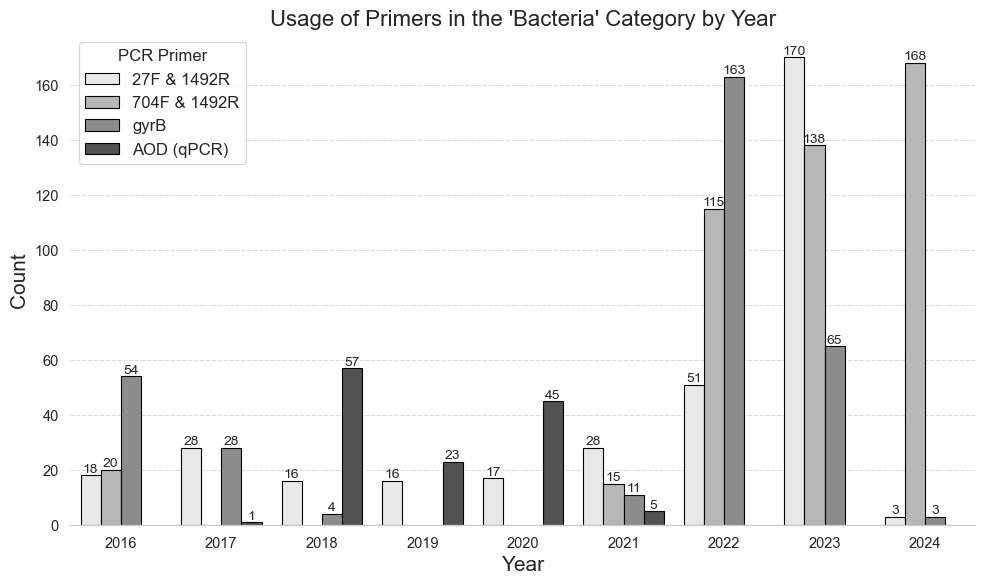

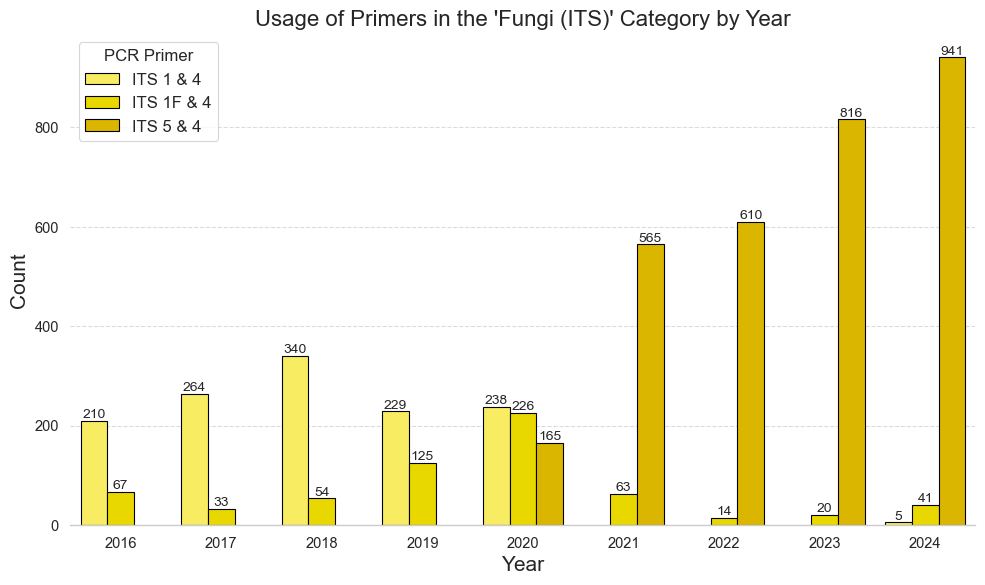

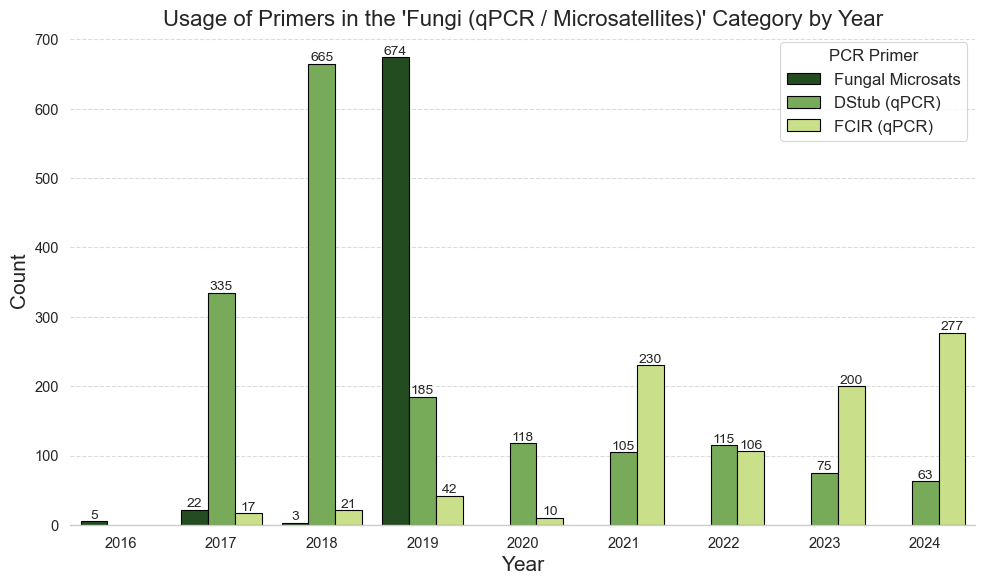

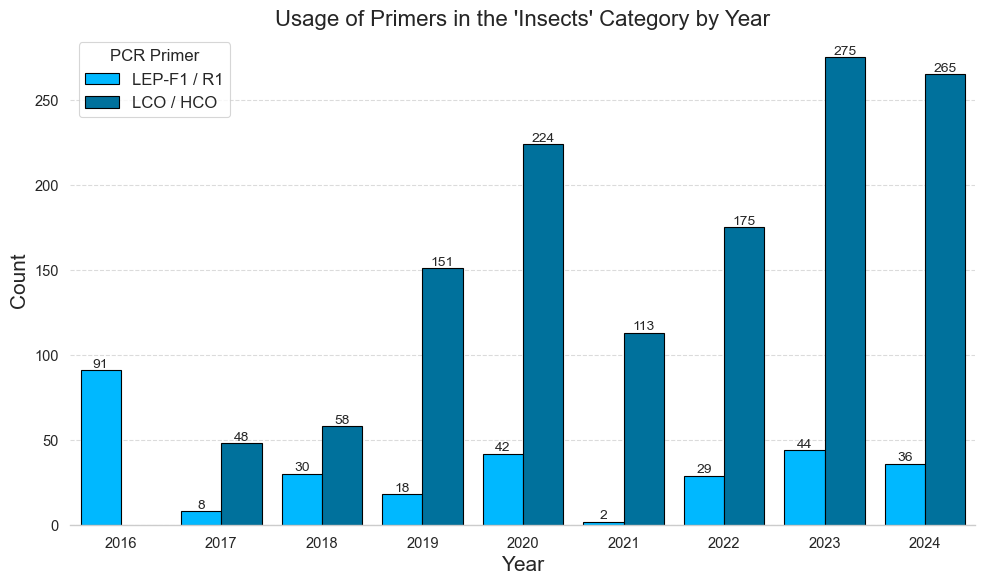

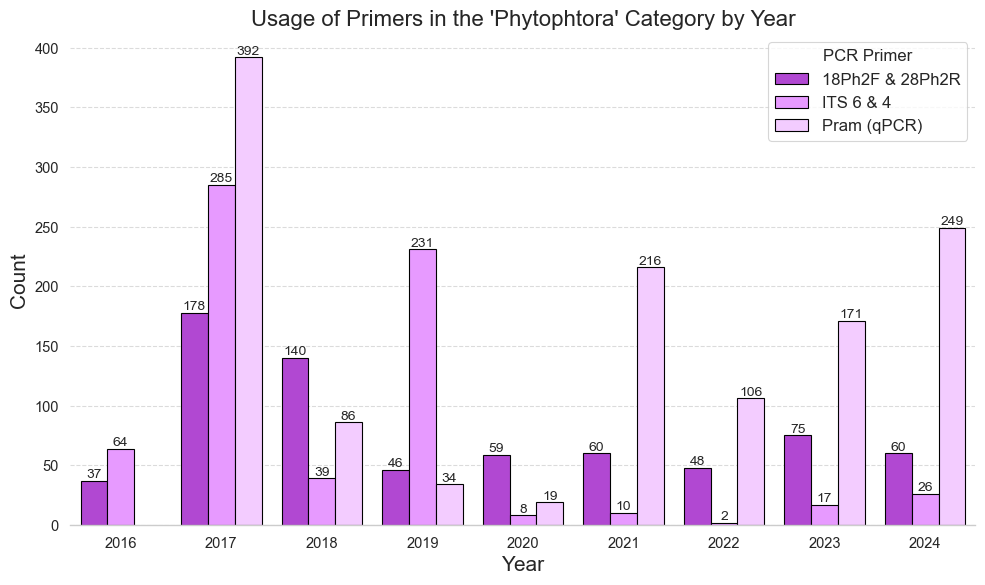

In [37]:
# plot primer usage
plot_nested_bar_chart(clean_data, selected_primers=bacteria_primers, primer_category="Bacteria", palette=palette_bacteria)
plot_nested_bar_chart(clean_data, selected_primers=fungi_primers, primer_category="Fungi (ITS)", palette=palette_fungi_barcode)
plot_nested_bar_chart(clean_data, selected_primers=fungi_qPCR_primers, primer_category="Fungi (qPCR / Microsatellites)", palette=palette_fungi_qpcr)
plot_nested_bar_chart(clean_data, selected_primers=insect_primers, primer_category="Insects", palette=palette_insects)
plot_nested_bar_chart(clean_data, selected_primers=phytophtora_primers, primer_category="Phytophtora", palette=palette_phytophtora)

Finally, we build a function that takes a primer as an input and creates a plot showing how often it was used over the years.

In [38]:
def plot_primer_usage(primer_name, df, color="#107DAC"):
    """
    Plots how often a given PCR Primer entry was used in each year.

    Parameters:
      primer_name (str): The primer name to filter on.
      df (pd.DataFrame): DataFrame containing the "PCR Primer" and "Year" columns.
    """
    # Filter the DataFrame for rows matching the specified primer
    df_primer = df[df["PCR Primer"] == primer_name]

    # Group by Year and count the number of occurrences
    usage_counts = df_primer.groupby("Year").size().reset_index(name="Count")

    # Set up the plot
    plt.figure(figsize=(10, 6))

    ax = sns.barplot(
        data=usage_counts,
        x="Year",
        y="Count",
        color=color,
        edgecolor = "black",  # outlines around bars
        legend=False,
        saturation = 1.0,  # how intense the colors appear
    )

    # This removes the spines of the plot (except for the bottom one)
    sns.despine(top=True, bottom=False, left=True, right=True)

    ax.set_title(f"Usage of Primer \n'{primer_name}' \nby Year", fontsize=16)
    ax.set_xlabel("Year", fontsize=15)
    ax.set_ylabel("Count", fontsize=15)

    # display the amount of counts for each primer
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.show()

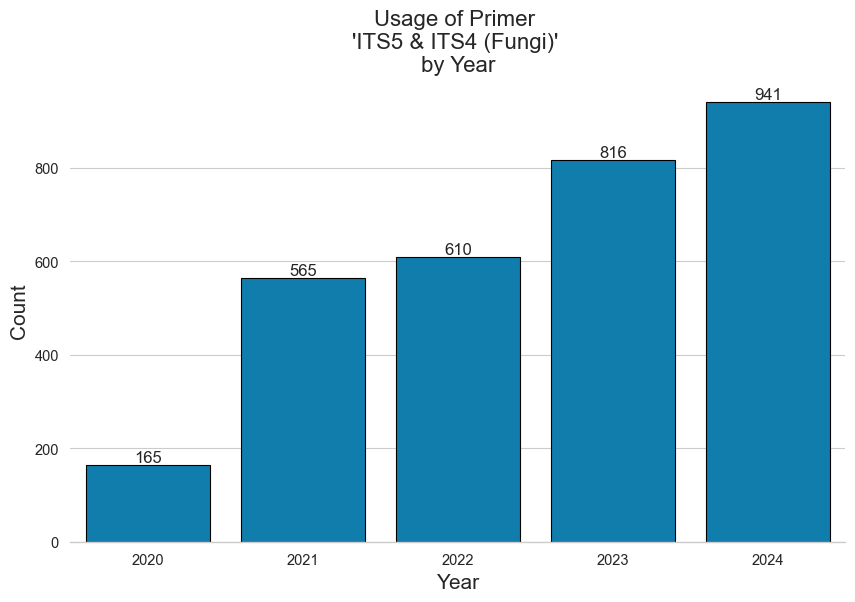

In [39]:
plot_primer_usage("ITS5 & ITS4 (Fungi)", clean_data)

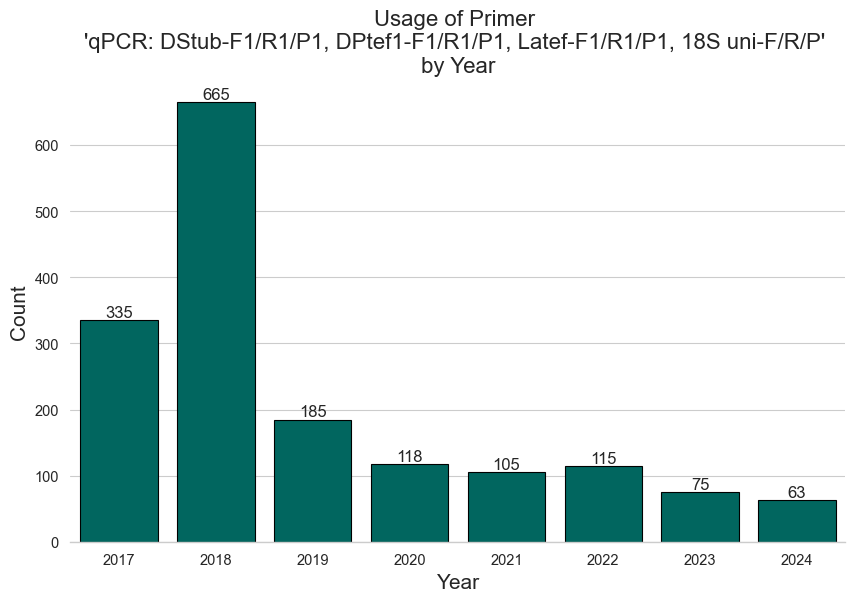

In [40]:
plot_primer_usage("qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P", clean_data, color="#01665f")

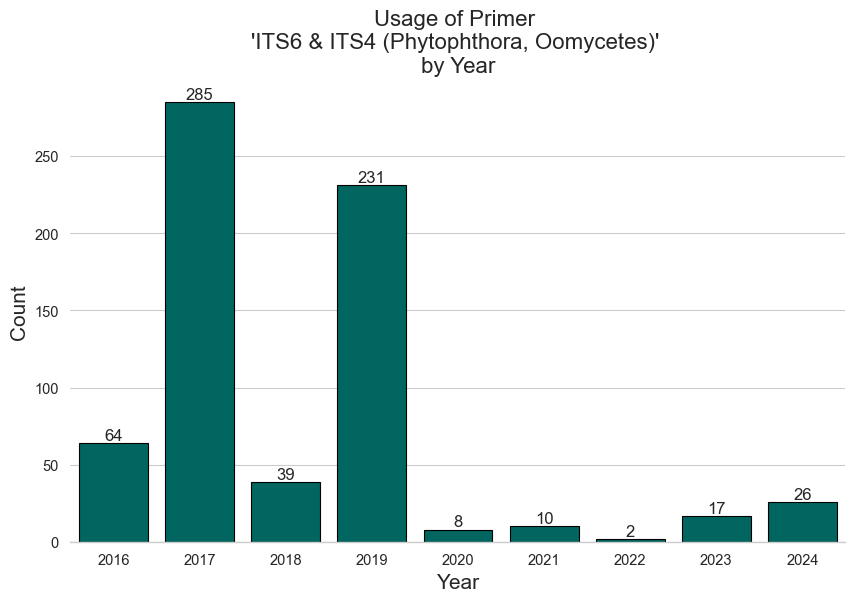

In [41]:
plot_primer_usage("ITS6 & ITS4 (Phytophthora, Oomycetes)", clean_data, color="#01665f")

Top 5 PCR Primer entries:
PCR Primer
ITS5 & ITS4 (Fungi)                                                            3097
qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P           1661
LCO1490 & HCO2198 (Insects)                                                    1309
ITS1 & ITS4 (Fungi/Plants)                                                     1286
qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe                         1273
qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe     903
Microsatellites C. parasitica (Microsatellites, Fungi)                          704
18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)                            703
ITS6 & ITS4 (Phytophthora, Oomycetes)                                           682
ITS1F & ITS4 (F spezifisch, Fungi)                                              643
Name: count, dtype: int64

Plotting usage for primer: ITS5 & ITS4 (Fungi)



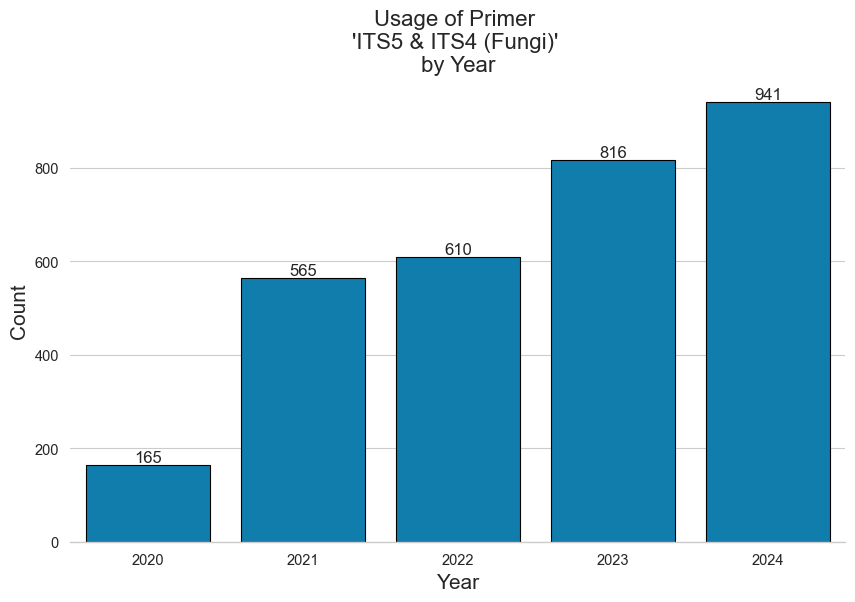


Plotting usage for primer: qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P



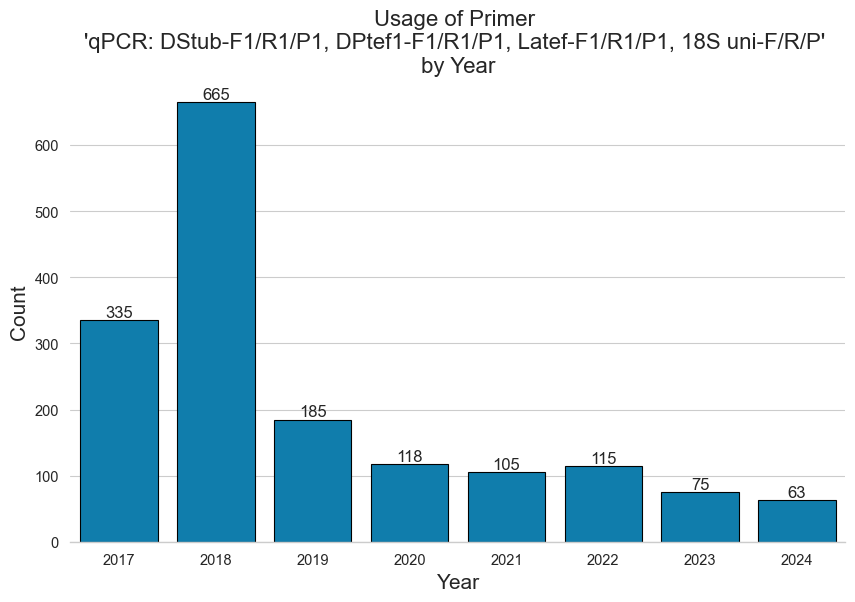


Plotting usage for primer: LCO1490 & HCO2198 (Insects)



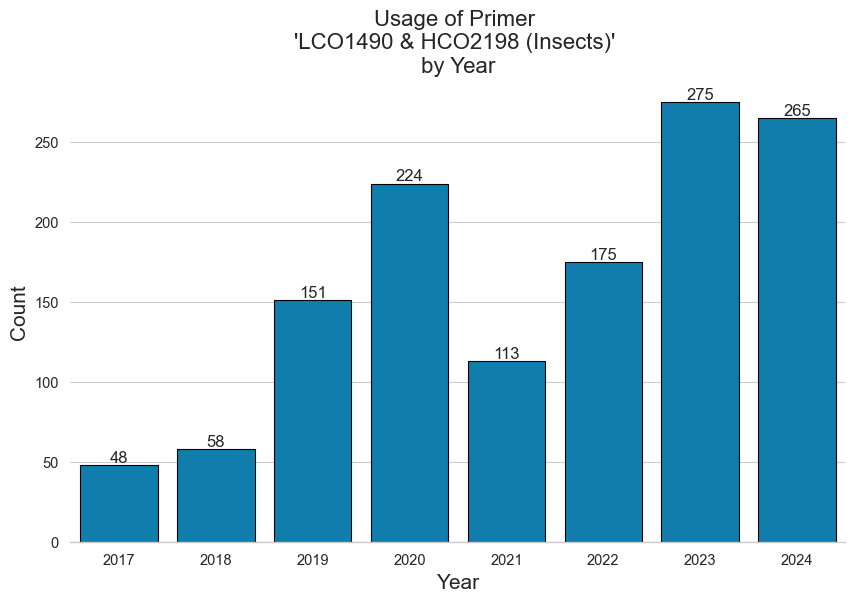


Plotting usage for primer: ITS1 & ITS4 (Fungi/Plants)



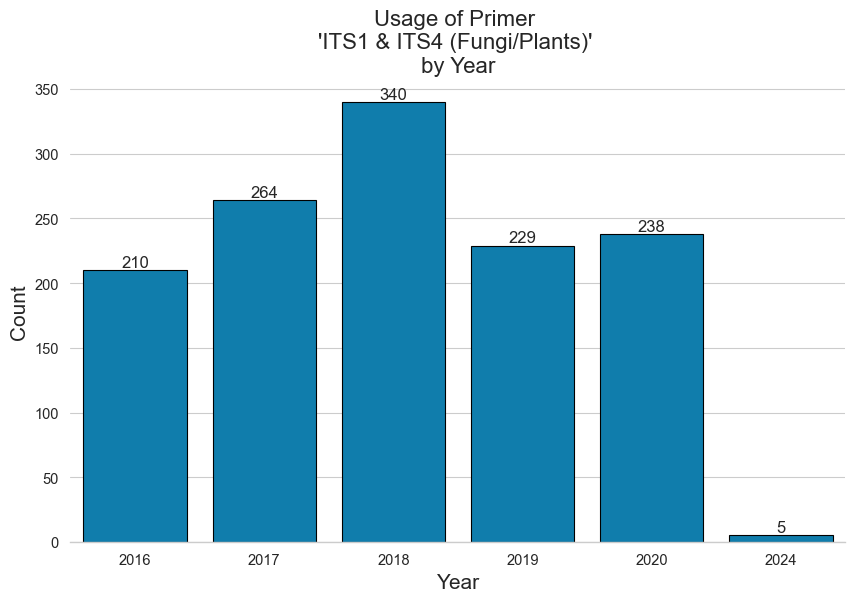


Plotting usage for primer: qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe



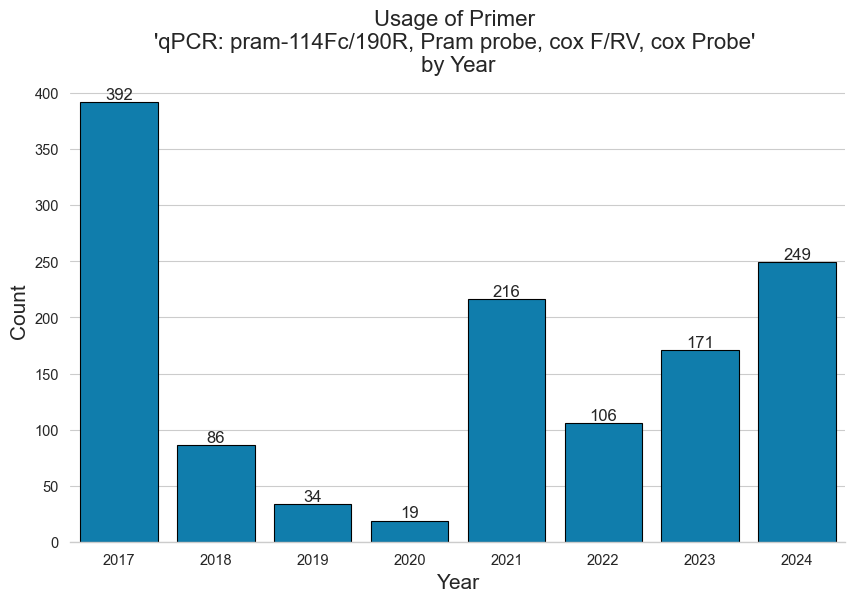


Plotting usage for primer: qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe



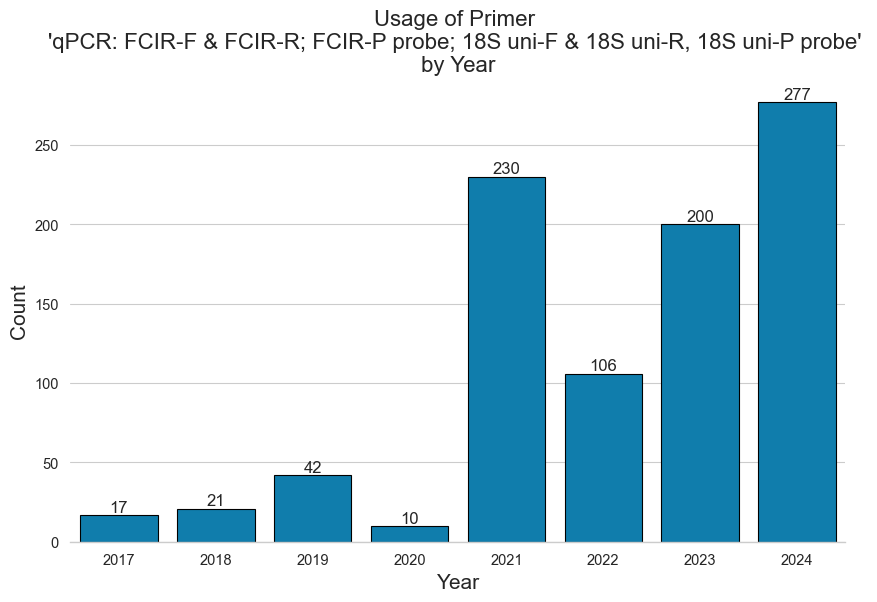


Plotting usage for primer: Microsatellites C. parasitica (Microsatellites, Fungi)



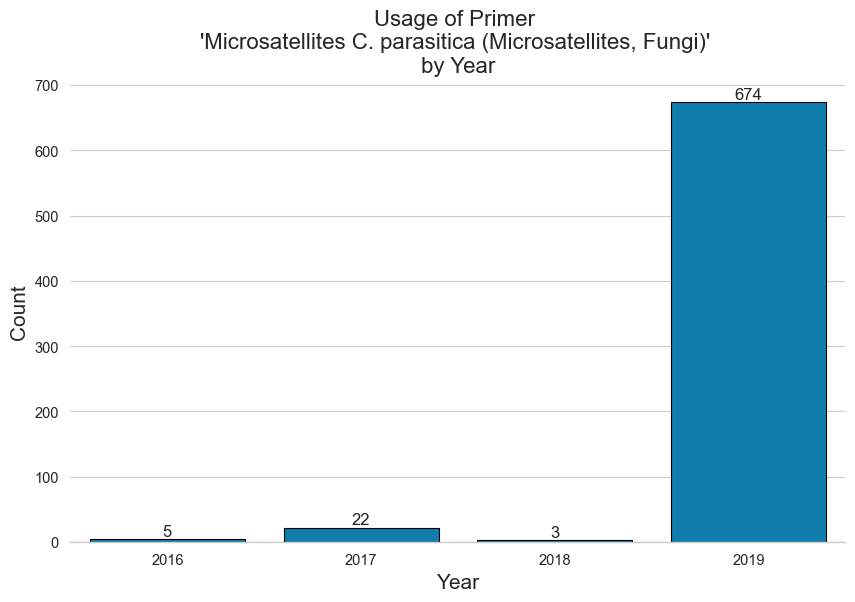


Plotting usage for primer: 18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)



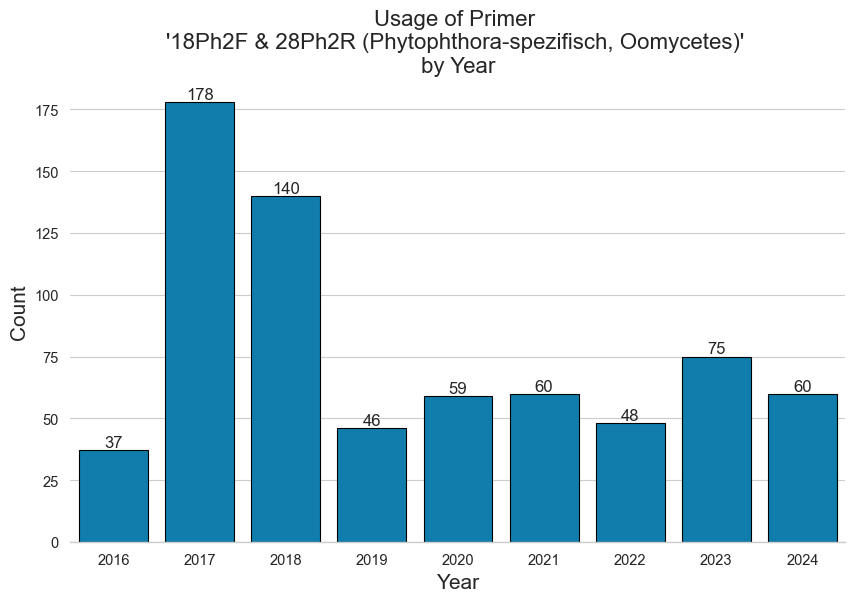


Plotting usage for primer: ITS6 & ITS4 (Phytophthora, Oomycetes)



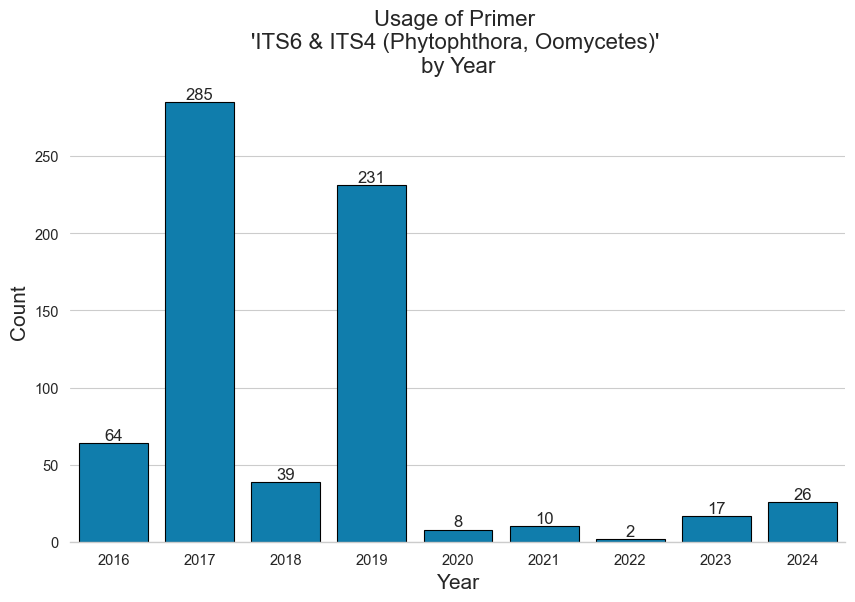


Plotting usage for primer: ITS1F & ITS4 (F spezifisch, Fungi)



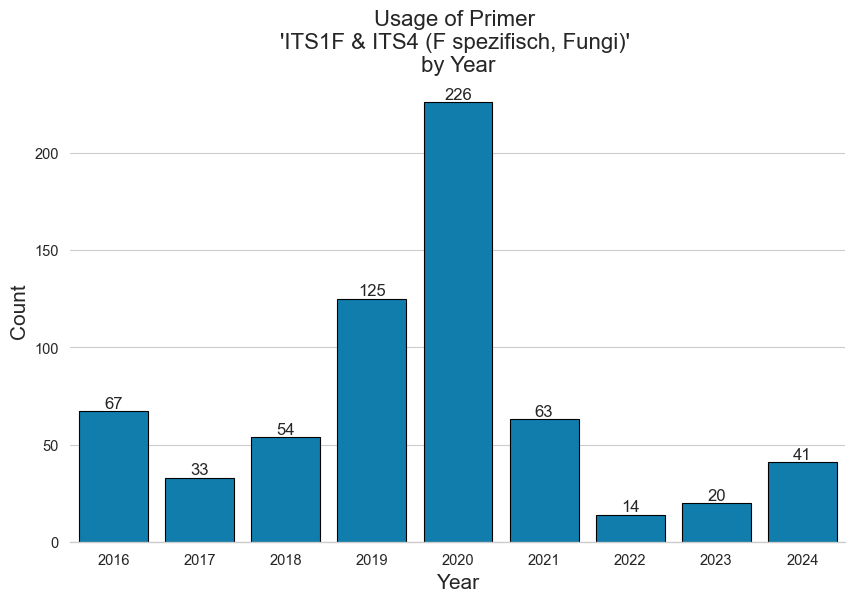

In [42]:

# Slice the top 5 primer entries by occurrence
top_primers = clean_data["PCR Primer"].value_counts().head(10)
print("Top 5 PCR Primer entries:")
print(top_primers)

# Automatically iterate and plot each of the top X amount of primers
for primer in top_primers.index:
    print(f"\nPlotting usage for primer: {primer}\n")
    plot_primer_usage(primer, clean_data)

### Adding Sequencing Type Information

#### DNA Sequencing Method vs Sequence availability

We want to have information on the sequencing type that was used for each database entry, so we add the Sequencing Method column, which is based on the information in the Primer Category column (checking for which types of primers were used as defined in the final_primer_mapping dictionary above).

In [43]:
# Create a boolean mask that is True if "qPCR" (ignoring case) is found in the specified column.
# qPCR_positive = clean_data['Labor::La_PCR_Primer'].str.contains("qPCR", case=False, na=False) | clean_data['Resultate::Re_Analysen'].str.contains("quantitative", case=False, na=False)

# New improved primers used instead:
qPCR_positive = (
    (clean_data['Primer Category'] == "qPCR") |
    # a few hundred qPCR entries did not have the primer info, but did have results info, hence why we check this column as well
    clean_data['Resultate::Re_Analysen'].str.contains("quantitative", case=False, na=False)
)

micro_satellite_positive = (
    (clean_data['Primer Category'] == "PCR with specific Primer and Gel-Electrophoreses") |
    (clean_data['Primer Category'] == "Microsatellites")
)

# Add a new column "Sequencing Method" with qPCR, Microsatellites or Barcode Sequencing
# np.where first checks where qPCR_positive is True and assigns "qPCR", and if False the nested np.where is read, etc.
clean_data['Sequencing Method'] = np.where(
    qPCR_positive,
    "qPCR",
    np.where(
        micro_satellite_positive,
        "Microsatellites",
        "Barcode Sequencing"
    )
)

Next, we will find out which columns that were barcode sequencing don't have a DNA sequence. This should not happen and implies that the organism could not be identified. Conversely, not having a sequence is expected where qPCR was used, and those organisms could be identified regardless of sequence.

In [44]:
# Create a mask for rows with "Barcode Sequencing"
barcode_mask = clean_data['Sequencing Method'] == "Barcode Sequencing"

# Create a mask for rows with no DNA sequence:
# This considers a field empty if it is NaN or an empty/whitespace-only string.
no_dna_mask = clean_data['Labor::La_Sequenz'].isnull() | (clean_data['Labor::La_Sequenz'].str.strip() == '')

# Combine the masks to select rows meeting both criteria
barcode_no_dna = clean_data[barcode_mask & no_dna_mask]

# Print the number of rows
print("Number of Barcode Sequencing rows with no DNA sequence:", len(barcode_no_dna))

Number of Barcode Sequencing rows with no DNA sequence: 1833


Due to the high amount of missing sequences from barcode sequencing analyses, we should visualize the distribution to assess our approach on how to handle them. An excessive amount of missing sequences there could imply a systemic error that might be corrected, instead of throwing out all that data. We will assign Masks (containing True or False for each row based on a given condition).

In [45]:
# Mask for qPCR rows
mask_qPCR = clean_data['Sequencing Method'] == "qPCR"

# Mask for Microsatellites
mask_microsatellites = clean_data['Sequencing Method'] == "Microsatellites"

# Mask for Barcode Sequencing rows
mask_barcode = clean_data['Sequencing Method'] == "Barcode Sequencing"

We will define a function to later create a mask of sequence availability in the database. The goal is to define conditions that contain all sequences independent of their structure. The challenge is the lack of standardization: We have sequences with headers but others without, we have string entries such as "bad read quality", and NA values etc. that make it hard to establish logical parameters that help us decide if a sequence is present or not.

Our assumptions will be:
1) Sequences with headers start with a ">"
2) Sequences with headers contain either a newline character "\n" or a whitespace " " that separates header and sequence
3) Valid DNA sequences will contain at least 50 capital letters.

In [46]:

def is_valid_sequence(cell):
    # Ensure we have a string; if not, return False.
    if not isinstance(cell, str):
        return False

    cell = cell.strip()

    # If the cell starts with '>', we assume that it is a sequence with a header
    if cell.startswith('>'):
        # If there's a newline, split on newline
        if '\n' in cell:
            lines = cell.splitlines()
            # Use all lines after the header as the sequence.
            sequence = ''.join(line.strip() for line in lines[1:])
        # Otherwise, if there's a space after the header, try splitting on the first space.
        elif ' ' in cell:
            # Assume header and sequence are separated by a space
            header, sequence = cell.split(' ', 1)
            sequence = sequence.strip()
        else:
            return False
    else:
        # If there is no header, the entire cell is assumed to be a sequence.
        # (if it is not actually a sequence this should be detected in the next if statement)
        sequence = cell

    # Sequence identity check: The sequence must contain at least 50 uppercase letters in total.
    if len(re.findall(r'[A-Z]', sequence)) >= 50:
        return True
    else:
        return False

mask_dna_present = clean_data["Labor::La_Sequenz"].apply(is_valid_sequence)
mask_dna_absent = ~mask_dna_present

print("Number of valid DNA sequences:", mask_dna_present.sum())
print("Number of invalid/missing sequences:", mask_dna_absent.sum())

Number of valid DNA sequences: 8660
Number of invalid/missing sequences: 9150


We can now apply the masks we created to quantify various metrics of interest.

In [47]:
# Count qPCR rows
count_qPCR = mask_qPCR.sum()

# Count microsatellite rows
count_microsatellite = mask_microsatellites.sum()

# For Barcode Sequencing, count rows with and without a DNA sequence.
count_barcode_missing = (mask_barcode & mask_dna_absent).sum()
count_barcode_present = (mask_barcode & mask_dna_present).sum()

# Create a dictionary with counts and friendly names
sequence_info_counts = {
    "Barcode Sequencing\n(With DNA Sequence)": count_barcode_present,
    "Barcode Sequencing\n(Missing DNA Sequence)": count_barcode_missing,
    "qPCR": count_qPCR,
    "Microsatellites": count_microsatellite
}

# next line was to answer another question, ignore it
# clean_data[mask_barcode & mask_dna_missing]["Resultate::Re_Analysen"].value_counts()

#### Visualizing Sequence Availability based on Sequencing Type

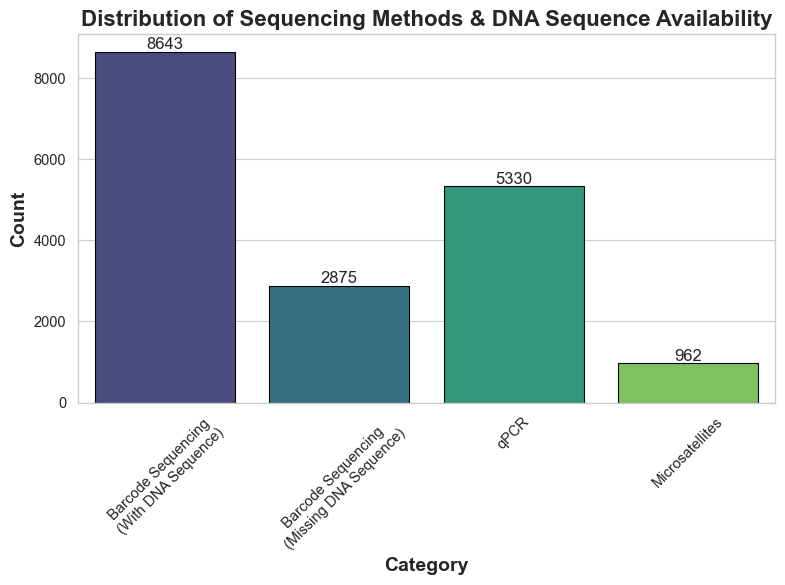

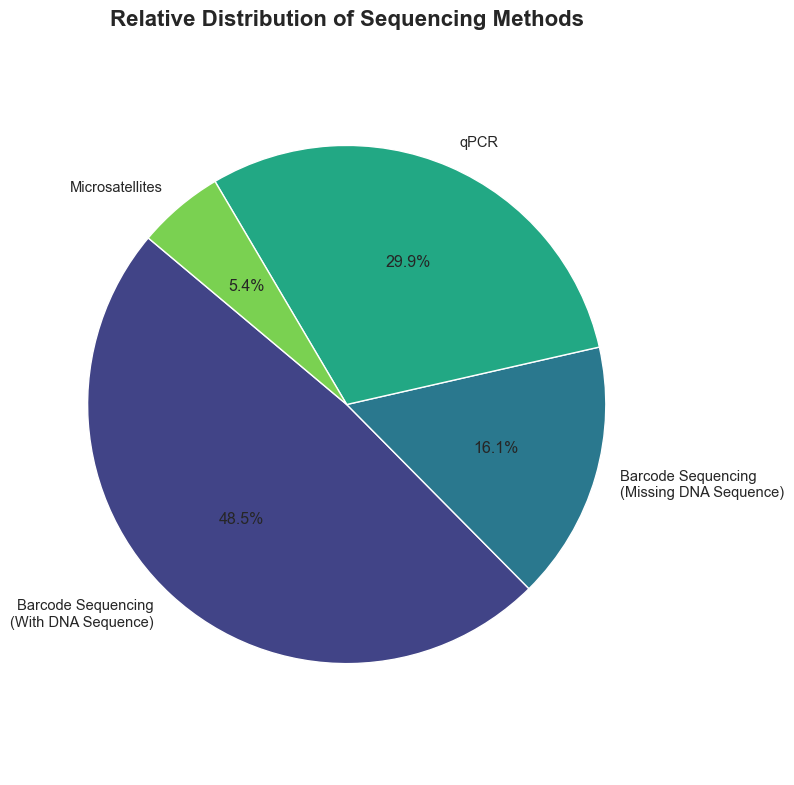

In [48]:
sequence_info_sequence_info_counts_df = pd.DataFrame({
    "Category": list(sequence_info_counts.keys()),
    "Count": list(sequence_info_counts.values())
})

plt.figure(figsize=(8, 6))

# Capture the Axes object returned by sns.barplot
ax = sns.barplot(
    data=sequence_info_sequence_info_counts_df,
    x="Category",
    y="Count",
    hue="Category",
    palette="viridis",
    edgecolor="black"
)

# Set labels and title via the Axes object
ax.set_title("Distribution of Sequencing Methods & DNA Sequence Availability", fontsize=16, fontweight='bold')
ax.set_xlabel("Category", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')

# Rotate the x-axis labels
ax.tick_params(axis='x', labelrotation=45)

# Loop over the bar containers to add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12)  # '%.0f' => integer format

plt.tight_layout()
plt.show()

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", n_colors=len(sequence_info_counts))
plt.pie(
    list(sequence_info_counts.values()),
    labels=list(sequence_info_counts.keys()),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Relative Distribution of Sequencing Methods", fontsize=16, fontweight='bold')
plt.axis('equal')  # Keep the pie chart circular.
plt.tight_layout()
plt.show()

#### Investigating Barcode Sequencing Entries with no available Sequence

In [49]:
clean_data[mask_barcode & mask_dna_absent]


,Au_Auftraggeber,Au_Auftragsdatum,Au_Bemerkungen,Au_DNA_ID,Au_Erstellt_am,Au_Erstellt_von,Au_Forschung_Diagnostik,Au_Fundort,Au_Material,Au_Organismus,...,Resultate::Re_Erstellt_von,Resultate::Re_Geändert_am,Resultate::Re_Geändert_von,Resultate::Re_Resultat,Resultate::Re_Resultat_von,Resultate::Re_Systemdatum,Primer Category,PCR Primer,Year,Sequencing Method
0,Renate Heinzelmann,NaN,NaN,PHP16_0001,NaT,NaN,NaN,NaN,Mycelium,Pilze,...,NaN,NaT,NaN,NaN,NaN,NaT,None,None,2016,Barcode Sequencing
1,Renate Heinzelmann,NaN,NaN,PHP16_0002,NaT,NaN,NaN,NaN,Mycelium,Pilze,...,NaN,NaT,NaN,NaN,NaN,NaT,None,None,2016,Barcode Sequencing
2,Renate Heinzelmann,NaN,NaN,PHP16_0003,NaT,NaN,NaN,NaN,Mycelium,Pilze,...,NaN,NaT,NaN,NaN,NaN,NaT,None,None,2016,Barcode Sequencing
3,Renate Heinzelmann,NaN,SSR: B8_VirSP,PHP16_0004,NaT,NaN,NaN,NaN,Mycelium,Pilze,...,NaN,NaT,NaN,NaN,NaN,NaT,None,None,2016,Barcode Sequencing
4,Renate Heinzelmann,NaN,SSR: B8_VirSP,PHP16_0005,NaT,NaN,NaN,NaN,Mycelium,Pilze,...,NaN,NaT,NaN,NaN,NaN,NaT,None,None,2016,Barcode Sequencing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17632,Maurice Moor,2024-09-05 00:00:00,"Leerung 5, Für Waldentomologie 5ml vor Filtrat...",PHP24_4255,2024-12-02 13:48:16,mittelst,Diagnostik,Zürich,Propylenglykol,Pilze,...,mittelst,2025-02-27 10:56:11,kupper,bisher keine Analysen,JM,NaT,None,None,2024,Barcode Sequencing
17661,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,ruffner,2025-02-27 10:56:11,kupper,Bestimmung nicht möglich (Keine Ziel-Amplifika...,BR,NaT,Insects,LCO1490 & HCO2198 (Insects),2024,Barcode Sequencing
17665,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,ruffner,2025-02-27 10:56:11,kupper,Bestimmung nicht möglich (Keine Ziel-Amplifika...,BR,NaT,Insects,LCO1490 & HCO2198 (Insects),2024,Barcode Sequencing
17695,Doris Hölling,2024-10-01 00:00:00,"SO_Fö_Ts_A, wahrscheinlich Leerung 5",PHP24_4304,2024-12-10 11:12:38,mittelst,Diagnostik,Solothurn,Monochmaus sp.,Insekten,...,mittelst,2025-02-27 10:56:11,kupper,Bestimmung nicht möglich (schlechte Sequenzqua...,JM,NaT,Insects,LCO1490 & HCO2198 (Insects),2024,Barcode Sequencing


### DNA Sequence Sorting

This section aims to prepare DNA sequences in the database for analysis. We need to remove missing entries and non sequence entries and then find a way to deal with the headers before we later re-BLAST them.

#### Using Sequence Mask to Isolate DNA Sequences

First, we create a new DataFrame that contains only has the rows where sequences exist and have a header (starting with ">").

In [50]:
# show entries that are marked as sequence present
sequence_present = clean_data[mask_dna_present]
print(len(sequence_present))

sequence_present["Labor::La_Sequenz"]

8660


10       CGGAGGGATCATTACCGAGTTATCAACTCCCCAAACCCCTGTGAAC...
11       AGGGATCATTACCGAGTTTACAACTCNCCNAACNNCNATGTGAANC...
12       GCGGAAGGATCATTAACGAGTTTTGAAAGGGGTTGTCGCTGGCCTT...
13       TGCGGAGGGATCATTGCTGGAACAAACGCCCTCACGGGTGCTACCC...
14       TCATTAACGAATAACTATGGTGTCTCAGGTTGTAGCTGGCTCCTCG...
                               ...                        
17709    >PHP24_4318_HCO\nCTCCTCCTCCTGCTGGATCAAAAAATGAT...
17710    >PHP24_4319_HCO\nTCCTCCTGCTGGATCAAAAAATGATGTAT...
17779    >PHP24_4348_HCO\nGGTCTCCTCCTCCTGCTGGATCAAAAAAT...
17780    >PHP24_4349_HCO\nGGTCTCCTCCTCCTGCTGGATCAAAAAAT...
17781    >PHP24_4350_HCO\nGGTCTCCTCCTCCTGCTGGATCAAAAAAT...
Name: Labor::La_Sequenz, Length: 8660, dtype: object

In [51]:
# show the entries that are marked as sequence absent
sequence_absent = clean_data[mask_dna_absent]
print("Number of rows marked as having no sequence:", len(sequence_absent))

# now only those rows that aren't NA values
sequence_absent_non_NA = sequence_absent.dropna(subset=["Labor::La_Sequenz"])
print("Number of rows marked as having no sequence but without NaN rows: ",len(sequence_absent_non_NA))

# Display the "Labor::La_Sequenz" column for those rows
sequence_absent_non_NA["Labor::La_Sequenz"]

Number of rows marked as having no sequence: 9150
Number of rows marked as having no sequence but without NaN rows:  1376


63                   kein PCR-Produkt
64                   kein PCR-Produkt
68                   nicht auswertbar
70                   nicht auswertbar
77                   nicht auswertbar
                     ...             
16545        Keine Ziel-Amplifikation
16546        Keine Ziel-Amplifikation
16821    Sequenzierung fehlgeschlagen
16838    Sequenzierung fehlgeschlagen
17565               Gemischte Sequenz
Name: Labor::La_Sequenz, Length: 1376, dtype: object

#### Handling Improperly Labeled Sequencing Methods

The discrepancy of 17 columns between the df containing rows where sequences have been detected and the its combination with those classified as "barcode sequencing" is a little strange.

It seems that these have been labeled as qPCR, while having a DNA sequence present. This needs to be checked.

In [52]:
# View rows that are valid sequences but do not have a barcode
sequence_present_but_not_labeled_as_barcode_sequencing = clean_data[mask_dna_present & ~mask_barcode]

# count amount of target entries
print("Number of valid sequences without a barcode:", len(sequence_present_but_not_labeled_as_barcode_sequencing))

# display these entries
sequence_present_but_not_labeled_as_barcode_sequencing


# reminder on how qPCR vs barcode sequencing was determined:
# qPCR_positive = clean_data['Labor::La_PCR_Primer'].str.contains("qPCR", case=False, na=False) | clean_data['Resultate::Re_Analysen'].str.contains("quantitative", case=False, na=False)
# the results in "Resultate::Re_Analysen contains things like:
# DNA-Isolierung und quantitative PCR**

Number of valid sequences without a barcode: 17


,Au_Auftraggeber,Au_Auftragsdatum,Au_Bemerkungen,Au_DNA_ID,Au_Erstellt_am,Au_Erstellt_von,Au_Forschung_Diagnostik,Au_Fundort,Au_Material,Au_Organismus,...,Resultate::Re_Erstellt_von,Resultate::Re_Geändert_am,Resultate::Re_Geändert_von,Resultate::Re_Resultat,Resultate::Re_Resultat_von,Resultate::Re_Systemdatum,Primer Category,PCR Primer,Year,Sequencing Method
1248,Hélène Blauenstein,2017-02-10 00:00:00,PR91,PHP17_0072,2017-02-24 07:57:21,NaN,NaN,NaN,Myzel,Oomyzeten,...,SchneidS,2023-02-20 10:35:10,Kupper,Phytophthora ramorum,NaN,NaT,Oomycetes,"ITS6 & ITS4 (Phytophthora, Oomycetes)",2017,qPCR
1680,Daniel Rigling,2017-03-27 00:00:00,in Wasser angereichert,PHP17_0313,2017-04-20 14:25:41,NaN,NaN,sihlwald,Holz,Oomyzeten,...,cornejo,2023-02-20 10:35:10,Kupper,Negativ Phytophthora ramorum.\nBLAST by QK: Ph...,NaN,NaT,qPCR,"qPCR: pram-114Fc/190R, Pram probe, cox F/RV, c...",2017,qPCR
1741,Hélène Blauenstein,2017-04-05 00:00:00,NaN,PHP17_0361,2017-04-25 15:45:01,NaN,NaN,Georgien,Reinkultur,Oomyzeten,...,cornejo,2023-02-20 10:35:10,Kupper,Phytophthora cinnamomi\nBLAST by QK (CC 27/04/17),NaN,NaT,Oomycetes,"ITS6 & ITS4 (Phytophthora, Oomycetes)",2017,qPCR
1743,Hélène Blauenstein,2017-04-05 00:00:00,NaN,PHP17_0363,2017-04-25 15:45:01,NaN,NaN,Georgien,Reinkultur,Oomyzeten,...,cornejo,2023-02-20 10:35:10,Kupper,Phytophthora cinnamomi\nBLAST by QK (CC 27/04/17),NaN,NaT,Oomycetes,"ITS6 & ITS4 (Phytophthora, Oomycetes)",2017,qPCR
2382,Simone Prospero,2017-08-02 00:00:00,NaN,PHP17_0877,2017-08-10 11:32:20,NaN,NaN,Schalunen,Reinkultur mit Agar,Oomyzeten,...,schoebel,2023-02-20 10:35:10,Kupper,Phytophthora sojae resp. P. asiatica mit gleic...,CC,NaT,Oomycetes,"ITS6 & ITS4 (Phytophthora, Oomycetes)",2017,qPCR
3547,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,cornejo,2023-02-20 10:35:10,Kupper,ITS-Sequenzierung: Phytophthora cactorum.,CC,NaT,Oomycetes,"18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomy...",2018,qPCR
3549,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,cornejo,2023-02-20 10:35:10,Kupper,ITS-Sequenzierung: Phytophthora cactorum.,CC,NaT,Oomycetes,"18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomy...",2018,qPCR
3702,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,cornejo,2023-02-20 10:35:10,Kupper,Art: Phytophthora plurivora.,CC,NaT,Oomycetes,"18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomy...",2018,qPCR
3710,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,cornejo,2023-02-20 10:35:10,Kupper,Art: Phytophthora cinnamomi.,CC,NaT,Oomycetes,"18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomy...",2018,qPCR
4203,Joana Meyer/Beat Ruffner,2018-09-07 00:00:00,Vermutet Trockenrisse mit Schleim-Schaumfluss,PHP18_0804,2018-09-21 14:21:00,NaN,NaN,ZH,Einzelkolonien,Bakterien,...,cornejo,2023-02-20 10:35:10,Kupper,Brenneria nigrifluens.,CC,NaT,Bacteria,27F & 1492R (Bacteria),2018,qPCR


tIt becomes clear that both barcode sequencing and qPCR was performed here, confusing our simple sequencing method classification algorithm a bit. It is likely best to simply manually reassign these few entries for the sequence analysis, as we might otherwise miss out on the sequence information.

In [53]:
# setting "Sequencing Method" column entries to "Barcode Sequencing" where there is a valid sequence but no barcode
clean_data.loc[mask_dna_present & ~mask_barcode, 'Sequencing Method'] = 'Barcode Sequencing'


We now verify that that the values have been properly adapted by updating the masks and checking our previous condition, which should now show 0 rows with both Barcode Sequencing and a valid DNA sequence being present.

In [54]:
# Mask for qPCR rows
mask_qPCR = clean_data['Sequencing Method'] == "qPCR"

# Mask for Barcode Sequencing rows
mask_barcode = clean_data['Sequencing Method'] == "Barcode Sequencing"

# View rows that are valid sequences but do not have a barcode
sequence_present_but_not_labeled_as_barcode_sequencing = clean_data[mask_dna_present & ~mask_barcode]

# count amount of target entries
print("Number of valid sequences without a barcode:", len(sequence_present_but_not_labeled_as_barcode_sequencing))

Number of valid sequences without a barcode: 0


#### Creating an extra column with just the Sequences (No Headers)

First, we need a new DataFrame that only contains valid DNA sequences, which we will use for all further DNA analyses.

In [55]:
# Create a new DataFrame containing only rows with a valid DNA sequence.
sequence_analysis_data = clean_data[mask_dna_present].copy()

Next, we will define a function that separates the sequences from their headers in order to later generate new custom headers from scratch.

In [56]:
# Define a function to extract the sequence without the header.
def extract_sequence(cell):
    # Ensure we have a string; if not, return an empty string.
    if not isinstance(cell, str):
        return ""

    cell = cell.strip()

    # If the cell starts with '>', assume it contains a header.
    if cell.startswith('>'):
        # If there's a newline, split on newline and use all lines after the header.
        if '\n' in cell:
            lines = cell.splitlines()
            sequence = ''.join(line.strip() for line in lines[1:])
        # If there's a space, assume the header and sequence are separated by it.
        elif ' ' in cell:
            _, sequence = cell.split(' ', 1)
            sequence = sequence.strip()
        else:
            # If no clear separation, return an empty string.
            return ""
    else:
        # If there's no header, the entire cell is the sequence.
        sequence = cell

    return sequence



# Apply the extraction function to create a new column with the cleaned sequences.
sequence_analysis_data["Sequence (No Header)"] = (
    sequence_analysis_data["Labor::La_Sequenz"].apply(extract_sequence)
)

# display the sequences (note the double [], needed to return df instead of series)
sequence_analysis_data[["Sequence (No Header)"]].iloc[10]

Sequence (No Header)    CATACCGTGTCGTTGCTTCGGCGGGCTGTCGCCTCCCCCCGGGGGG...
Name: 20, dtype: object

#### Assigning New Headers

We now build a function that will take both the sequence without header and returns a new sequence with a custom-built header.

The header will use PHPa to indicate that it is not the original header, but rather a custom-built one from this project. We then add the four digit year the sample was sequenced in, and the analysis ID (instead of the DNA ID which can have duplicates and thus makes for an inferior index reference)

The structure of this new header should be:
>"\>PHPa"\_\<Year>_<Analysis_ID_number\>"\n"

So, for example:
>\>PHPa_2022_0001
> <Br>
ACTG....

In [57]:
def build_clean_sequence(row):
    # Get the sequence without the header.
    seq_no_header = row["Sequence (No Header)"]

    # Get the Analysis ID
    # (e.g. "20210375")
    # we call int() to prevent a  .0 from being appended at the end of our string, as the analysis IDs are saved as floating point numbers (with a comma).
    dna_id = int(row["Labor::Analyse_ID"])

    # Extract the four-digit year from the ID.
    # Assumes the format is "<year><id_number>"
    # (e.g. 2021 from "20210375")
    # We do this by converting the analysis ID into a string first and then slicing it

    year = str(dna_id)[0:4]

    # Extract the last four digits (ID number) after the underscore.
    # (e.g. 0375 from "20210375")
    # We do this by converting the analysis ID into a string first and then slicing it
    seq_id = str(dna_id)[4:]
    # Build the new header and combine it with the sequence.
    # For example, ">PHPa_2021_0375\n"
    header = f">PHPa_{year}_{seq_id}\n"
    return header + seq_no_header

# Apply the function row-wise to create a new column "Sequence (Header)".
sequence_analysis_data["Sequence (Header)"] = sequence_analysis_data.apply(build_clean_sequence, axis=1)

# printing the dataframe is less convenient here since it shows the \n everywhere
# sequence_analysis_data[["Sequence (Header)"]]

# instead, we can use iloc to display a single sequence and see if it works as intended:
# (it seems to not actually read newline statements in series or df objects)
print(sequence_analysis_data["Sequence (Header)"].iloc[0])

>PHPa_2016_11
CGGAGGGATCATTACCGAGTTATCAACTCCCCAAACCCCTGTGAACATACCTTTTGTTGCCTCGGCGGGATCGCCCCGGCGCCTCCGGGCCCGGACCCAGGCGCCCGCCGCAGGACCCTAAACTCTTGTTTTCTATATGAATCTTCTGAGTGACACAAGCAAATAAATTAAAACTTTCAACAACGGATCTCTTGGTTCTGGCATCGATGAAGAACGCAGCGAAATGCGATAAGTAATGTGAATTGCAGAATTCAGTGAATCATCGAATCTTTGAACGCACATTGCGCCCGGCAGTATTCTGCCGGGCATGCCTGTTCGAGCGTCATTTCAACCCTCAAGCCCCCGGGCTTGGTGTTGGAGATCGGCCCGCCCCCGTGGCTGGCCGGCTCCGAAATCCAGTGGCGGTCCCGCTGTAGCTTCCTCTGCGTAGTAGCAATATCTCGCACCGGAACGCGACGGAGCCCTGCCGTAAAACCCCCAACTTCTGAAGGTTGACCTCGGATCAGGTAGGAATACCCGCTGAACTTAAGCATATCAATANGNNGGAGGAA


### Handling Missing Primers

Identifying instances where a sequence is present but primer information is missing is important, as we cannot verify our BLAST results without them in the next section. Furthermore, we will also exclude the primer category we designated as "No Group" from further analyses, as we haven't assigned them to a category like other primers.

In [58]:
# Count missing values in 'PCR Primer'
num_missing_pcr_primers = sequence_analysis_data['PCR Primer'].isnull().sum()

# Checking for empty strings just in case:
num_empty_strings = (sequence_analysis_data['PCR Primer'] == "").sum()

# Count entries with "No Group" in 'Primer Category'
num_no_group = (sequence_analysis_data['Primer Category'] == "No Group").sum()

print("Number of missing values in 'PCR Primer':", num_missing_pcr_primers)
print("Number of empty strings in 'PCR Primer':", num_empty_strings)
print("Number of entries with 'No Group' in 'Primer Category':", num_no_group)


Number of missing values in 'PCR Primer': 230
Number of empty strings in 'PCR Primer': 0
Number of entries with 'No Group' in 'Primer Category': 31


In [59]:
# Optionally, print the number of remaining rows
print("Initial rows:", len(sequence_analysis_data))

# Create a mask for rows with missing values or empty strings in 'PCR Primer'
mask = sequence_analysis_data['PCR Primer'].isnull() | (sequence_analysis_data['Primer Category'] == "No Group")

# Remove those rows by keeping only rows where the mask is False
sequence_analysis_data = sequence_analysis_data[~mask]

# Optionally, print the number of remaining rows
print("Remaining rows:", len(sequence_analysis_data))

Initial rows: 8660
Remaining rows: 8399


### Saving a Copy of Analysis Data for BLAST

We now save the sequence_analysis_data DataFrame as an Excel file in the data folder. This lets us run the BLAST search later independently of the rest of the notebook.

In [60]:
# save the df as an Excel file
sequence_analysis_data.to_excel("data/checkpoint_data/sequence_analysis_data.xlsx", index=False)

# Diagnostics Requests (Auftrag) Data Trends

The aim of the following sections is to identify the amount of different organism types (e.g. fungi, bacteria) found in each year.
BAFU requests come with a recommended analysis (Au_Organismus). This initial idea of the organism distribution should be represented and could later be compared to what the molecular diagnostics reveal as opposed to the initial assessment of the field researcher or the third party requesting the analysis.

## Data Cleanup - Adding Extra Columns with Standardized Information

### Adding "Year" column

 Initially, we will add a "Year" column to conveniently group samples based on their date, letting us assess diagnostics evolution over time.

However, the Au_DNA_ID contains duplicate IDs or NaN values, which need to be handled first. One option here is to create a new DataFrame specifically for our sample processing Analysis (the object of this section). This allows us to simply remove the offending rows, which are not relevant here, as they refer to extra analyses carried out in the diagnostics section. While we need those sections to remain in clean_data for other analyses (such as the genetic data), they are not relevant to studying how many samples are handed it and what kind of samples those are.

In [61]:
# new DataFrame only keeps rows where Au_DNA_ID is not an NaN value
sample_processing_data = clean_data[clean_data['Au_DNA_ID'].notnull()]

# removes duplicates values (but keeps every first instance)
sample_processing_data = sample_processing_data.drop_duplicates(
    subset='Au_DNA_ID',
    keep='first'
)

Next, we need to find the unique entries for the Au_Organismus column. This lets us see if they are properly standardized and consistent.

In [62]:
# this returns a list with all unique elements
# unique_organisms = sample_processing_data['Au_Organismus'].unique()
# print(unique_organisms)

# this returns a dataframe that also shows how often each unique element appears
organism_counts = sample_processing_data['Au_Organismus'].value_counts()
organism_counts # check categories

Au_Organismus
Pilze                    8973
Insekten                 1721
Oomyzeten                1600
Bakterien                1148
Nematoden                 642
Pilze & Oomyzeten         146
Sporen                     78
Pflanze                    64
Pilz                       26
Sporen                     18
Bakterien                  16
Ooomyzeten                  4
Bakterien & Oomyzeten       4
19/10/2017                  3
pilze                       1
Oomyzet                     1
Name: count, dtype: int64

The column names in Au_Organismus are inconsisten or contain errors, sometimes also simply to unspecific.
We therefore need to add an "Organism" Column that gives one clear assessment for each sample, or sorts it into "unspecified".

In [63]:
# Define a function to standardize the entries
def standardize_organism(organism):
    # creating an empty global variable to avoid scope issues with my if statement
    org_clean = ''
    # checks if the entry is a string (because for example an accidental float entry will throw an error if .strip() is called on it
    if isinstance(organism, str):
        # Remove extra spaces and convert to lower case for consistency
        org_clean = organism.strip().lower()
    # Map multiple strings to standardized categories
    if org_clean in ['pilze', 'pilz']:
        return 'Fungus'
    elif org_clean in ['insekten']:
        return 'Insect'
    elif org_clean in ['nematoden']:
        return 'Nematode'
    elif org_clean in ['bakterien', 'bacterium']:
        return 'Bacterium'
    elif org_clean in ['oomyzeten', 'ooomyzeten', 'oomyzet']:
        return 'Oomycete'
    elif org_clean in ['pflanze']:
        return 'Plant'
    else:
        return 'Unspecified'

# Apply the function to create a new column "Organism"
# .apply() runs the function on each row for the selected column
sample_processing_data['Organism'] = sample_processing_data['Au_Organismus'].apply(standardize_organism)

# check that the categories got sorted properly
sample_processing_data['Organism'].value_counts()

Organism
Fungus         9000
Insect         1721
Oomycete       1605
Bacterium      1164
Nematode        642
Unspecified     304
Plant            64
Name: count, dtype: int64

Group the organism categories by year

In [64]:
# .groupby() groups the df by two columns, where each unique combination of year and data becomes a group (returns "MultiIndex")
# .size() counts the number of rows in each group (returns series indexed with grouped pairs)
# .unstack() converts that series with a MultiIndex into a DataFrame
counts = sample_processing_data.groupby(['Year', 'Organism']).size().unstack(fill_value=0)
# we can then visualize the resulting df
counts

Organism,Bacterium,Fungus,Insect,Nematode,Oomycete,Plant,Unspecified
Year,,,,,,,
2016,92,399,119,45,97,2,0
2017,55,667,61,39,632,22,49
2018,95,1099,86,113,185,0,6
2019,37,1273,156,90,275,0,0
2020,65,912,254,152,60,5,0
2021,68,1218,130,85,70,26,3
2022,232,969,202,40,69,1,0
2023,318,1183,392,61,132,1,96
2024,202,1280,320,17,85,7,150


## Visualizing the Data

Plotting this data as is might be misleading as the total amount of collected samples likely varies each year. For example, it is more interesting to see the relative quantity of fungi in 2016 than the absolute quantity.

Accordingly, we should first plot the amount of total samples collected in each year.

In [65]:
# generate df containing years and amount of rows for each year
total_samples = sample_processing_data.groupby('Year').size().reset_index(name='Count')
total_samples

,Year,Count
0,2016,754
1,2017,1525
2,2018,1584
3,2019,1831
4,2020,1448
5,2021,1600
6,2022,1513
7,2023,2183
8,2024,2061


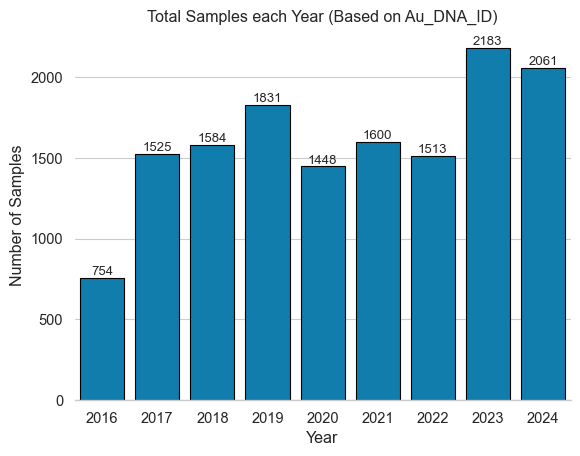

In [66]:
# Create the bar plot and capture the Axes object
ax = sns.barplot(
    data=total_samples,
    x='Year',
    y='Count',
    color = "#107DAC",
    # hue = "Year",
    # palette = "light:green",  # or "deep", "muted", "bright", etc.
    edgecolor = "black",  # outlines around bars
    legend=False,
    saturation = 1.0,  # how intense the colors appear
)

# This removes the left spine of the plot
sns.despine(left=True)

# Setting labels and title using the Axes object methods
ax.set_title('Total Samples each Year (Based on Au_DNA_ID)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Samples')
ax.bar_label(ax.containers[0], fontsize=9.5)

plt.show()

Next, we will make a 100% stacked barchart to visualize the relative frequency of organism categories for each year.

In [67]:
# Group by Year and Organism to get counts, then normalize to get proportion per year
# (Each entry in df_grouped is the fraction of that organism in that year)
relative_organism_abundance = sample_processing_data.groupby('Year')['Organism'].value_counts(normalize=True).unstack(fill_value=0)
relative_organism_abundance

Organism,Bacterium,Fungus,Insect,Nematode,Oomycete,Plant,Unspecified
Year,,,,,,,
2016,0.122016,0.529178,0.157825,0.059682,0.128647,0.002653,0.000000
2017,0.036066,0.437377,0.040000,0.025574,0.414426,0.014426,0.032131
2018,0.059975,0.693813,0.054293,0.071338,0.116793,0.000000,0.003788
2019,0.020208,0.695248,0.085199,0.049153,0.150191,0.000000,0.000000
2020,0.044890,0.629834,0.175414,0.104972,0.041436,0.003453,0.000000
2021,0.042500,0.761250,0.081250,0.053125,0.043750,0.016250,0.001875
2022,0.153338,0.640449,0.133510,0.026438,0.045605,0.000661,0.000000
2023,0.145671,0.541915,0.179569,0.027943,0.060467,0.000458,0.043976
2024,0.098011,0.621058,0.155264,0.008248,0.041242,0.003396,0.072780


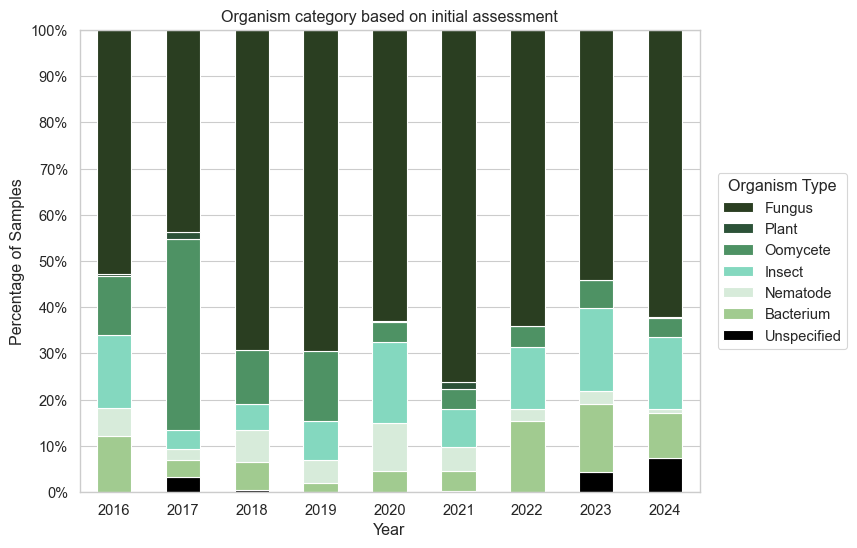

In [68]:
desired_order = ['Fungus', 'Plant', 'Oomycete', 'Insect', "Nematode", "Bacterium", "Unspecified"]
relative_organism_abundance = relative_organism_abundance[desired_order]

# hex values for color palette
palette = sns.color_palette(["#000000", "#a1cb90", "#d7ebda", "#84d8bf", "#4e9264", "#2c5238", "#2a3e21"])

# Plot the 100% stacked bar chart
# we index the database with the columns in reverse order by passing [.columns[::-1]] on the df
# this means unspecified is not at the top of the plot and thus not at the beginning of the legend. (aesthetic preference)
ax = relative_organism_abundance[relative_organism_abundance.columns[::-1]].plot(
    kind='bar',
    stacked=True,
    color=palette,
    figsize=(8, 6)
)

# Format the y-axis to show percentages
ax.set_ylim(0, 1)  # data ranges from 0 to 1 after normalization
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 in PercentFormatter means "1.0 -> 100%"

# Label the axes and add a title
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Samples")
ax.set_title("Organism category based on initial assessment")
# setting y-axis percentage intervals (standard range() only accepts full integer steps, not floats, hence use of numpy)
ax.set_yticks(np.arange(0, 1.1, 0.1))

# the following line is required to reverse the legend order properly without messing up color or data order
# it lets us specify the handles and labels argument for the ax.legend() method
# labels refers to the text labels themselves while handles seems to be important in tying them to data category and color
handles, labels = ax.get_legend_handles_labels()
# set up legends, including specifying x and y coordinates preventing from overlapping with the plot
ax.legend(loc='center right',
          title='Organism Type',
          bbox_to_anchor=(1.25, 0.5),
          handles=handles[::-1],
          labels=labels[::-1]
          # labels=relative_organism_abundance.columns[::-1]
)

# ensures the years are shown horizontally
# NOTE: The semicolon at the end of the statement prevents printing xtick array to the console
plt.xticks(rotation=0);

##### Primer Based Plot

We need to reassign dictionary values for "Primer Category" so that the entries such as qPCR or microsats are instead assigned to their respective organism category, which will prevent unecessary biases in the comparison between the Au_Organismus based plot and the Primer Category plot.

In [69]:
organism_primer_mapping = {

  "Fungi": {
    ## chestnut blight
    "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
      "qPCR: Cp-F4 & Cp-R3; CP-S3_Probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    ## plane wilt canker stain disease
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Porbe":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev8":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev15":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev14":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev7":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev6":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev2":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev3":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev4":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev5":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev31":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev30":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev24":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev25":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev26":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev27":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev28":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev29":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev23":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev22":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev16":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev17":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev18":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev19":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev20":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev21":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev13":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev12":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev11":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev10":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev9":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    ## Swiss needle cast
    "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P":
      "qPCR: PGBT308F/PGBT429R/PG336BTUBP, 18S uni-F/R/P",
    ## chestnut blight disease
    "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "qPCR: C.P.Sn.For1/Rev1; COX F/RW":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    "C.P.Sn.For1/Rev1":
      "qPCR: C.P.Sn.For1/Rev1/C.P.TM.Pr.; COX F/RW/Probe",
    ## ash dieback
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_VIC":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: Cfrax-F, Cfrax-R, Cfrax_Probe_FAM, UNI28S-fwd/rev/P joe":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: Cfrax-F/-R/Probe_FAM, 28S_uni-F/-R/-P_JOE":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    "qPCR: CfraxF/CfraxR, Cfrax_Probe, 28S_uni-F/28S_uni-R, 28S_uni-P":
      "qPCR: Cfrax-F/-R/Probe_FAM, UNI28S-fwd/rev/P joe",
    ## Pine pitch canker
    "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe":
      "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    "FCIR-F & FCIR-R (F. circinatum)":
      "qPCR: FCIR-F & FCIR-R; FCIR-P probe; 18S uni-F & 18S uni-R, 18S uni-P probe",
    ## redband needle blight or brownspot needle blight
    "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P (qPCR Dothi)":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    "DStub-F1/R1, DPtef1-F1/R2, Latef-F1/R1, 18S uni-F/R":
      "qPCR: DStub-F1/R1/P1, DPtef1-F1/R1/P1, Latef-F1/R1/P1, 18S uni-F/R/P",
    ## ITS (nuclear ITS rRNA gene)
    "ITS5 & ITS4 (Fungi)":
      "ITS5 & ITS4 (Fungi)",
    ## ITS, primers not only specific to fungi
    "ITS1 & ITS4 (Fungi/Plants)":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS4 (Fungi)":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS5":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS6":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS10":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS11":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS12":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS13":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS15":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS14":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS16":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS17":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS18":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS19":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS7":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS8":
      "ITS1 & ITS4 (Fungi/Plants)",
    "ITS1 & ITS9":
      "ITS1 & ITS4 (Fungi/Plants)",
    ## ITS, primers specific to fungi
    "ITS1F & ITS4 (F spezifisch, Fungi)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4 (Fungi)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1 & ITS4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4,4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F / ITS4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1/4":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    "ITS1F & ITS4 (Fungi, F spezifisch)":
      "ITS1F & ITS4 (F spezifisch, Fungi)",
    ## ITS - Rust fungi
    "ITS5u & ITS4rust (Fungi, Rust specific)":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS5u/ITS4rust":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS5u / ITS4rust":
      "ITS5u & ITS4rust (Fungi, Rust specific)",
    "ITS6 & ITS4BR-rev (Rostpilze)":
        "ITS6 & ITS4BR-rev (Rostpilze, Fungi)",
    "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch)":
        "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)",
    "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)":
      "Rust2inv & LR6 & LRust1R & LRust2 (Rust-spezifisch, Fungi)",
    ## transcription elongation factor TEF
    "EF1 & EF2 (Fusarium sp., Fungi)":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1 & EF2 (Fungi)":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1 & EF2 (Fungi) ":
      "EF1 & EF2 (Fusarium sp., Fungi)",
    "EF1-728 &EF1-986R (elong. Factor Fungi)":
      "EF1-728 & EF1-986R (Fusarium sp., Fungi)",
    ## Armillaria specific TEF
    "EF595 F & ArmEF1a R (Armillaria sp., Fungi)":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "EF595 F & ArmEF1a R (Armillaria sp.)":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    "EF595 F / ArmEF1a R":
      "EF595 F & ArmEF1a R (Armillaria sp., Fungi)",
    ## Eutypella parasitica
    "EpF & EpR":
      "EpF & EpR (Eutypella sp., Fungi)",
    "EpF/EpR":
      "EpF & EpR (Eutypella sp., Fungi)",
    ## powdery mildew
    "PMITS1 & PMITS2 (Mehltau, Fungi)":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 / PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1/PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 & PMITS2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1/2":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
    "PMITS1 & PMITS2 (Mehltau)":
      "PMITS1 & PMITS2 (Mehltau, Fungi)",
        ## this should be written NOT as Barcoding and NOT as qPCR when analyses are counted
    "Microsatellite":
      "Microsatellites C. parasitica (Microsatellites, Fungi)",
    "Microsatellites":
      "Microsatellites C. parasitica (Microsatellites, Fungi)",
    ##
    "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Fungi)":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "VIC-Loci multiplex 1/2 (C. parasitica)":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "Multiplex 1&2 für vic-Loci und MAT-Gene":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    "Cp Vic Loci & Mating type multiplex":
      "Multiplex 1+2 für vic-Loci und MAT-Gene von C. parasitica (Microsatellites, Fungi)",
    ## MAT2 gene
    "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (D. septosporum)":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Dothi-F1 & Dothi-R1":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Dothi-F1 & Dothi-R (Dothistroma specific)":
      "DseptoMat1f, DotMat1r, DseptoMat2f & DotMat2r (PCR with gel, D. septosporum, Fungi)",
    "Md MAT1-1 F/R & md MAT1-2 F/R (L. acicola)":
      "Md MAT1-1 F/R & md MAT1-2 F/R (PCR with gel, L. acicola, Fungi)"
  },

  "Insects": {
    ## ALB microsats
    "Aglab_cox1_F/R2":
      "Microsatellites A. glabripennis (ALB) (Microsatellites, Insects)",
    ## asian longhorned beetle
    "qPCR: ALB_185 & ALB_347; ALB_320 FAM; 18S uni-F & 18S uni-R":
      "qPCR: ALB_185/347, ALB_320 probe, 18S uni-F/R/P",
    ## Cytochrome oxidase 1 COI or COX
    "LCO1490 & HCO2198 (Insects)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO (insects)":
      "LCO1490 & HCO2198 (Insects)",
    "LCO1490 & HCO2198 (Insekten)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO (Insects)":
      "LCO1490 & HCO2198 (Insects)",
    "HCO/LCO":
      "LCO1490 & HCO2198 (Insects)",
    ## COI for Lepidoptera
    "LEP-F1 & LEP-R1 (Insects)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1 (insects)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R1 (Insekten)":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R8":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R7":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R6":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R5":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R4":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R3":
      "LEP-F1 & LEP-R1 (Insects)",
    "LEP-F1 & LEP-R9":
      "LEP-F1 & LEP-R1 (Insects)",
    ## M13 Tailed COI
    "Fol-degen-for & Fol-degen-rev":
      "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    "M13F-Fol-degen-for & M13R-Fol-degen-rev":
      "M13F-Fol-degen-for & M13R-Fol-degen-rev (Insects)",
    ## ITS for Dendrolimus species
    "ITS2A & ITS2B (Dendrolimus sp, Insects)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "ITS2A & ITS2B (Dendrolimus spp)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    "ITS 2A/B (Insekten)":
      "ITS2A & ITS2B (Dendrolimus sp, Insects)",
    ## CAD (carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase)
    "apCADforB2 & apCADrecImod (Insekten)":
      "apCADforB2 & apCADrecImod (Insects)",
    ## 28S (28S ribosomal RNA)
    "3690s & a4285 (Insekten)":
      "3690s & a4285 (Insects)",
    ## Ips typographus specific
    "Ips_F_cons / Ips_R_cons":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "Ips_F_cons & Ips_R_cons (insects/ Ips sp.)":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    "Ips_F_cons & Ips_R_cons (Ips sp.)":
      "Ips_F_cons & Ips_R_cons (Ips sp., Insects)",
    ##
    "COI_J_2183F/COI_N_2568R":
      "COI_J_2183 & COI_N_2568 (Coccoidea/Schildläuse, Insects)"
  },
  "Plants": {

    "rbcLA-f & rbcLa-rev (Pflanzen)":
      "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "PlanttrnLc & PlanttrnLd (Pflanzen)":
      "trnH2 & psbAF (Plants)",
    "ITS_p5 & ITS_u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS_p5 & ITS_p4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "rbcLA-f rbcLa-rev":
      "rbcL-a_f & rbcLa SI_Rev (Plants)",
    "ITS-p5 & ITS-u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u5":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITS-p5 & ITS-u6":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u5":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "PTS_p5/u6":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)",
    "ITSp5/u4":
      "ITS-p5 & ITS-u4 (Pflanzen-spezifisch, Plants)"
  },
  "Oomycetes": {
    ## ink disease
    "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, Pcin_147F2/Pcin5_246R2/PcinP, UNI28S-fwd/rev/P joe":
      "qPCR: Pcamb1/Pcamb3/Pcamb P2 JUN, UNI28S-fwd/rev/P joe",
    ## ramorum disease
    "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe":
      "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    "pram-114Fc/190R, Pram probe, cox F/RV, cox Probe (qPCR Pram)":
      "qPCR: pram-114Fc/190R, Pram probe, cox F/RV, cox Probe",
    ## ITS
    "ITS6 & ITS4 (Phytophthora)":
      "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    "ITS6 & ITS4":
      "ITS6 & ITS4 (Phytophthora, Oomycetes)",
    ##
    "18Ph2F & 28Ph2R (Phytophthora specific)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R (Phytophthora-spezifisch)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph-F & 28Ph-R (Phytophthora specific)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F & 28Ph2R (Phytophthora)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph2F–28Ph2R":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    "18Ph-F & 28Ph-R (Phytophthora)":
      "18Ph2F & 28Ph2R (Phytophthora-spezifisch, Oomycetes)",
    ## COI Pram specicfic
    "COXF-CIT & COXR-CIT":
      "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)":
      "COXF-CIT & COXR-CIT (P. ramorum Strain identification, Oomycetes)",
    ## downy mildew
    "OoCox2F & OoCox2R (Falscher Mehltau)":
      "OoCox2F & OoCox2R (Falscher Mehltau, Oomycetes)",
  },
  "Nematodes": {
    ## Pine wood nematode
    "qPCR: BSatF/R/S, 18S uni-F/R/P ":
      "qPCR: BSatF/R/S, 18S uni-F/R/P",
    "BSatF/R/S, 18S uni-F/R/P (qPCR Bxyl)":
      "qPCR: BSatF/R/S, 18S uni-F/R/P",
    ## nuclear ITS
    "ITS 1/2 & Fol-1t-F/R (nematodes)":
      "ITS 1/2 & Fol-1t-F/R (Nematodes)",
    "ITS 1/2 & Fol-1t-F/R":
      "ITS 1/2 & Fol-1t-F/R (Nematodes)"
  },


  "Bacteria": {
    ## Pseudomonas syringae pv aesculi
    "qPCR: AM-Aes1-F/AM-Aes1-R":
      "qPCR: AM-Aes1-F/AM-Aes1-R",
    "AM-Aes1-F/AM-Aes1-R (qPCR Psa)":
      "qPCR: AM-Aes1-F/AM-Aes1-R",
    ## Acute oak decline AOD
    "qPCR: Gq284F, Gq418R, Gq342P; Bg-F, Bg-R, Bg-P; Rv-F, Rv-R, Rv57P":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "Bg-F, Bg-R, BgP, Gq-F, Gq-R, GqP":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "Bg-F/R, Gq-F/R, Rv-F/R, 16Suni-F/R":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    "qPCR: Gq-F/R/P, Bg-F/R/P. Rv-F/R/P":
      "qPCR: Gq284F, Gq418R, Gq342P; Bg-F/R/P; Rv15-F, Rv134-R, Rv57P, 18S uni-F/R/P",
    ## GyrB (DNA-Gyrase B)
    "gyrB-F & gyrB-R (Bacteria)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R (Bakterien)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R (bacteria)":
      "gyrB-F & gyrB-R (Bacteria)",
    "gyrB-F & gyrB-R":
      "gyrB-F & gyrB-R (Bacteria)",
    "GyrB":
      "gyrB-F & gyrB-R (Bacteria)",
    ## rear 16S (16S rRNA gene)
    "704F & 1492R (Bacteria)":
      "704F & 1492R (Bacteria)",
    "704F & 1492R (Bakterien)":
      "704F & 1492R (Bacteria)",
    "704F & 1492R (bacteria)":
      "704F & 1492R (Bacteria)",
    "Bakterien: 704F":
      "704F & 1492R (Bacteria)",
    "Bakterien: 1492R":
      "704F & 1492R (Bacteria)",
    ## full 16S (16S rRNA gene)
    "27F & 1492R (Bacteria)":
      "27F & 1492R (Bacteria)",
    "27F & 1492R (bacteria)":
      "27F & 1492R (Bacteria)",
    "27F & 1492R (Bakterien)":
      "27F & 1492R (Bacteria)",
    "Bakterien: 27F":
      "27F & 1492R (Bacteria)",
    "Bakterien: 27F & 1492R":
      "27F & 1492R (Bacteria)",
    "27F & 1492R":
      "27F & 1492R (Bacteria)",
    "27F & 708F & 787R & 1492R":
      "27F & 1492R (Bacteria)",
    ## front 16S (16s rRNA gene)
    "27F & 787R (Bacteria)":
      "27F & 787R (Bacteria)",
    "27F & 787R (Bakterien)":
      "27F & 787R (Bacteria)",
    "27F/787R":
      "27F & 787R (Bacteria)",
    "Bakterien: 787R":
      "27F & 787R (Bacteria)",
    ## rpoD (delta subunit of RNA polymerase)
    "PsEG30F & PsEG790R (bacteria)":
      "PsEG30F & PsEG790R (rpoD, Bacteria)",
    ## recA (DNA recombination & repair protein)
    "recA1f & recA1r (bacteria)":
      "recA1f & recA1r (recA, Bacteria)",
    ## rpoB (beta subunit of RNA polymerase)
    "LAP5 & LAPS27 (bacteria)":
      "LAP5 & LAPS27 (rpoB, Bacteria)",
    ## gyrase B, Xanthomonas-specific
    "XgyrFsp / XgyrRsp":
      "XgyrB1-F & XgyrB1-R (Xanthomonas, Bacteria)",
    "XgyrB1-F & XgyrB1-R (Xanthomonas)":
      "XgyrB1-F & XgyrB1-R (Xanthomonas, Bacteria)"
  },

  "No Group": {
    ## these are all samples (Analysen) that will be excluded from further analyses, just to understand how many these were would be nice
    ## technically 16S but other primers (length is >1400bp)
    "S-D-Bact-0008-a-S-16 & S-D-Bact-1492-a-A-16 (bacteria)":
      "No Group",
    "ITS1F & ITS4-B (Basidiomycetes)":
      "No Group", ## change??
    "ITS1 & Hpsal (Hymenoscyphus fraxineus spezifisch)":
      "No Group",
    "PSA2F &PSA 2R":
      "No Group",
    "Ins3.2F & Ins3.2R (insects)":
      "No Group",
    "AG":
      "No Group",
    ## these are fungi but there are only <10 samples (Armillaria)
    "Bt1a & Bt1b":
      "No Group",
    "Bt2a & Bt2b": ## beta tubulin
      "No Group",
    "Fol-t1 for & Fol-t1 rev": ## Nematodes from Monitoring
      "No Group",
    ## primers for Cparasitica (Nobuhiro)
    "MtF2 / MtR2":
      "No Group",
    ## H3 Histone, <10 Proben
    "H3-1a & H3-1b":
      "No Group",
    "C_arcuata_1F/R":
      "No Group",
    "C_arcuata_2F/R":
      "No Group",
    "NoF & NoNuR (Verticillium nonalfalfae specific)":
      "No Group"
  }

}



In [70]:
def map_primer_based_on_organism(row):
    # Get the old primer label from the DataFrame
    old_label = row["Labor::La_PCR_Primer"]
    primer_category = None
    new_primer = None

    # Loop through each category in the nested dictionary
    for category, mapping in organism_primer_mapping.items():
        if old_label in mapping:
            primer_category = category
            new_primer = mapping[old_label]
            break  # Exit the loop once a match is found

    # Return a Series that can be assigned to new columns
    return pd.Series({"Primer-based Organism Category": primer_category, "PCR Primer": new_primer})


# Apply the function row-wise to add the new columns to clean_data
# note that axis=1 means apply the function to each row (whereas 0 would be columns)
sample_processing_data[["Primer-based Organism Category", "PCR Primer"]] = clean_data.apply(map_primer_based_on_organism, axis=1)

In [71]:
# .groupby() groups the df by two columns, where each unique combination of year and data becomes a group (returns "MultiIndex")
# .size() counts the number of rows in each group (returns series indexed with grouped pairs)
# .unstack() converts that series with a MultiIndex into a DataFrame
primer_based_counts = sample_processing_data.groupby(['Year', 'Primer-based Organism Category']).size().unstack(fill_value=0)

# Group by Year and Organism to get counts, then normalize to get proportion per year
# (Each entry in df_grouped is the fraction of that organism in that year)
relative_primer_based_organism_abundance = sample_processing_data.groupby('Year')['Primer-based Organism Category'].value_counts(normalize=True).unstack(fill_value=0)

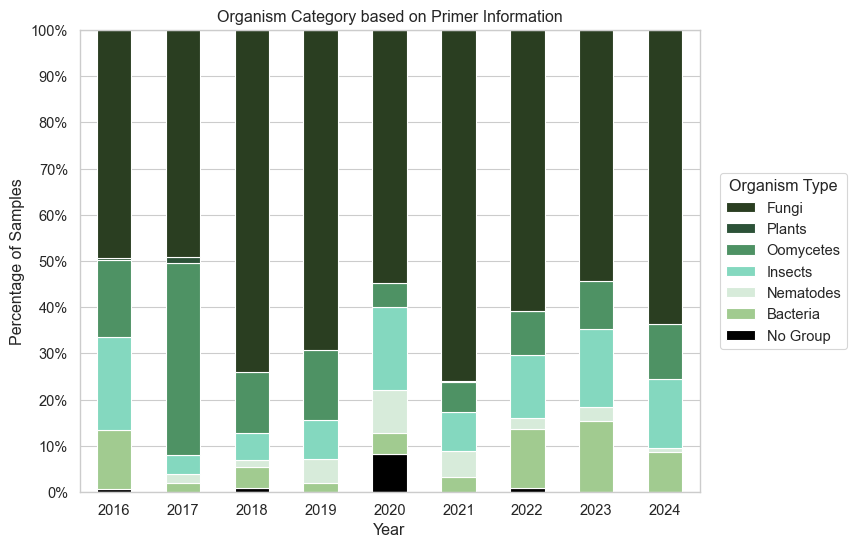

In [72]:
desired_order = ['Fungi', 'Plants', 'Oomycetes', 'Insects', "Nematodes", "Bacteria", "No Group"]
relative_primer_based_organism_abundance = relative_primer_based_organism_abundance[desired_order]

# hex values for color palette
palette = sns.color_palette(["#000000", "#a1cb90", "#d7ebda", "#84d8bf", "#4e9264", "#2c5238", "#2a3e21"])


# Plot the 100% stacked bar chart
# we index the database with the columns in reverse order by passing [.columns[::-1]] on the df
# this means unspecified is not at the top of the plot and thus not at the beginning of the legend. (aesthetic preference)
ax = relative_primer_based_organism_abundance[relative_primer_based_organism_abundance.columns[::-1]].plot(
    kind='bar',
    stacked=True,
    color=palette,
    figsize=(8, 6)
)

# Format the y-axis to show percentages
ax.set_ylim(0, 1)  # data ranges from 0 to 1 after normalization
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 in PercentFormatter means "1.0 -> 100%"

# Label the axes and add a title
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Samples")
ax.set_title("Organism Category based on Primer Information")
# setting y-axis percentage intervals (standard range() only accepts full integer steps, not floats, hence use of numpy)
ax.set_yticks(np.arange(0, 1.1, 0.1))

# the following line is required to reverse the legend order properly without messing up color or data order
# it lets us specify the handles and labels argument for the ax.legend() method
# labels refers to the text labels themselves while handles seems to be important in tying them to data category and color
handles, labels = ax.get_legend_handles_labels()
# set up legends, including specifying x and y coordinates preventing from overlapping with the plot
ax.legend(loc='center right',
          title='Organism Type',
          bbox_to_anchor=(1.25, 0.5),
          handles=handles[::-1],
          labels=labels[::-1]
          # labels=relative_organism_abundance.columns[::-1]
)

# ensures the years are shown horizontally
# NOTE: The semicolon at the end of the statement prevents printing xtick array to the console
plt.xticks(rotation=0);

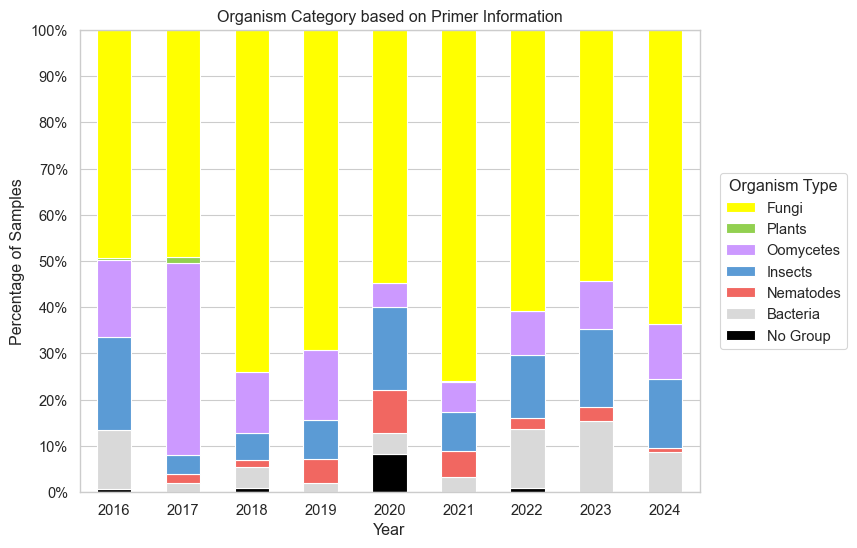

In [73]:
desired_order = ['Fungi', 'Plants', 'Oomycetes', 'Insects', "Nematodes", "Bacteria", "No Group"]
relative_primer_based_organism_abundance = relative_primer_based_organism_abundance[desired_order]

# handpicked hex values for color palette
palette = sns.color_palette([
    "#000000",  # black,
    "#D9D9D9", # grey
    "#F16761", # red
    "#5B9BD5", # blue
    "#CC99FF", # purple
    "#92D050", # green
    "#FFFF00", # yellow
])

# Plot the 100% stacked bar chart
# we index the database with the columns in reverse order by passing [.columns[::-1]] on the df
# this means unspecified is not at the top of the plot and thus not at the beginning of the legend. (aesthetic preference)
ax = relative_primer_based_organism_abundance[relative_primer_based_organism_abundance.columns[::-1]].plot(
    kind='bar',
    stacked=True,
    color=palette,
    figsize=(8, 6)
)

# Format the y-axis to show percentages
ax.set_ylim(0, 1)  # data ranges from 0 to 1 after normalization
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 1.0 in PercentFormatter means "1.0 -> 100%"

# Label the axes and add a title
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Samples")
ax.set_title("Organism Category based on Primer Information")
# setting y-axis percentage intervals (standard range() only accepts full integer steps, not floats, hence use of numpy)
ax.set_yticks(np.arange(0, 1.1, 0.1))

# the following line is required to reverse the legend order properly without messing up color or data order
# it lets us specify the handles and labels argument for the ax.legend() method
# labels refers to the text labels themselves while handles seems to be important in tying them to data category and color
handles, labels = ax.get_legend_handles_labels()
# set up legends, including specifying x and y coordinates preventing from overlapping with the plot
ax.legend(loc='center right',
          title='Organism Type',
          bbox_to_anchor=(1.25, 0.5),
          handles=handles[::-1],
          labels=labels[::-1]
          # labels=relative_organism_abundance.columns[::-1]
)

# ensures the years are shown horizontally
# NOTE: The semicolon at the end of the statement prevents printing xtick array to the console
plt.xticks(rotation=0);